# 0.Veri setinin hazırlanması

 kütüphanelerin yüklenmesi

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [300]:
# Veriyi yükleme
df_ = pd.read_csv('/kaggle/input/turkey-earthquake-data-1914-2023/veriler.csv')
df=df_.copy()

In [301]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 7) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(1, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)


# 1.Veri Analizi

In [302]:
# İlk 5 satırı kontrol etme
df.head()

No       Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  Der(km)  \
0       1           NaN  2023.07.31  21:53:38.29  37.4153  37.1703      4.0   
1       2  2.023073e+13  2023.07.31  15:23:16.85  38.1413  38.4340      5.2   
2       3  2.023073e+13  2023.07.31  02:50:49.84  37.8352  26.8353      6.2   
3       4  2.023073e+13  2023.07.30  20:19:40.49  40.8085  31.0183      5.3   
4       5  2.023073e+13  2023.07.30  16:13:52.62  38.1290  38.1863      2.4   

    xM   MD   ML   Mw   Ms   Mb Tip  \
0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2  3.0  NaN  3.0  0.0  0.0  0.0  Ke   
3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                                 Yer  
0     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  
1               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]  
2                           SISAM ADASI (EGE DENIZI)  
3       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]  
4  CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]

In [303]:
#tekrarlanan veri var mı diye kontrol ediliyor.
df.duplicated().sum()

0

Kolonların ismi değiştirliyor ve bazı sütünlar siliniyor.

In [304]:
rename_cols = {
    "Olus tarihi" : 'date'
    ,'Olus zamani' : 'time'
    ,'Enlem' : 'latitude'
    ,'Boylam' : 'longtitude'
    ,'Derinlik(km)' : 'depth'
    ,'Tip(Type)' : 'type'
    ,'Yer' : 'location'
    ,'D.Büyüklüğü'  : 'xM'
}

df.rename(columns = rename_cols , inplace = True) 
df.drop('Deprem Kodu' , axis = 1 , inplace = True) 
df.head(5)

No            date         time  latitude  longtitude  Der(km)   xM   MD  \
0       1  2023.07.31  21:53:38.29   37.4153     37.1703      4.0  3.5  0.0   
1       2  2023.07.31  15:23:16.85   38.1413     38.4340      5.2  3.5  0.0   
2       3  2023.07.31  02:50:49.84   37.8352     26.8353      6.2  3.0  NaN   
3       4  2023.07.30  20:19:40.49   40.8085     31.0183      5.3  3.1  0.0   
4       5  2023.07.30  16:13:52.62   38.1290     38.1863      2.4  3.0  0.0   

    ML   Mw   Ms   Mb Tip                                           location  
0  3.5  3.4  0.0  0.0  Ke     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  
1  3.5  3.4  0.0  0.0  Ke               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]  
2  3.0  0.0  0.0  0.0  Ke                           SISAM ADASI (EGE DENIZI)  
3  3.1  3.1  0.0  0.0  Ke       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]  
4  3.0  0.0  0.0  0.0  Ke  CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]

In [ ]:
#date sütünundaki verileri kullanabilir hale getiriyorum.
year_ = pd.to_datetime(df['date']).dt.year
monthn_ = pd.to_datetime(df['date']).dt.month
month_ = pd.to_datetime(df['date']).dt.month_name()


df.insert(1 , 'year' ,year_)
df.insert(2 , 'month_n' ,monthn_)
df.insert(3 , 'month' ,month_)


df['date'] = pd.to_datetime(df['date'])
df['time'] = df['time'].apply(lambda x: pd.Timestamp(x, unit='s'))

df.head(5)


In [ ]:
#location sütunundaki verileri kullanabilir hale getiriyorum
city_ = df['location'].str.extract('\((.*?)\)', expand=False).str.title() 


df.insert(len(df.columns) , 'city' , city_)

df.head(5)

In [ ]:
df.tail(5)

In [ ]:
print('Before Cleaning Rows:{} Columns:{}'.format(df.shape[0] , df.shape[1]))

In [ ]:
df.isnull().sum() / df.shape[0] 

In [ ]:
# Veri setinin boyutunu kontrol etme
print(f"Veri setinin boyutu: {df.shape}")

# Veri setinin sütun isimleri
print(f"Sütün isimleri: {list(df.columns)}", '\n')

# Veri tipi bilgileri
print("Veri Tipleri:")
print(df.dtypes)


In [ ]:
df.info()

In [ ]:
categorical_features = [col for col in df.columns if (df[col].dtype == "object") or (df[col].dtype == "categorical")]
numerical_features = [col for col in df.columns if df[col].dtype != "object" and df[col].dtype != "categorical"]


Sütunları kategorik ve sayısal olarak sınıflandırmak için kullanılmıştır.

In [ ]:
categorical_features, numerical_features

In [ ]:
df[categorical_features] = df[categorical_features].apply(pd.Categorical)


In [ ]:
df.info()

In [ ]:
df['location'][:5]

In [ ]:
df.describe().T

In [ ]:
df.describe(include="all")# deneme  amaçlı 


# 2.Eksik verilerin analizi


In [ ]:
# Eksik olan değerlerin sayısı
df.isna().sum()

In [ ]:
#Toplam eksik olan değerlerin sayısı
df.isna().sum().sum()

In [ ]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

In [ ]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

In [ ]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

In [ ]:
# Eksik verileri kontrol etme
missing_data = df.isnull().sum()

# Eksik veri oranını hesaplama
missing_percentage = (missing_data / len(df)) * 100

# Eksik verilerin yüzdesini gösterme
print("Eksik Veri Yüzdeleri:")
print(missing_percentage[missing_percentage > 0])

# Eksik verileri görselleştirme 
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Eksik Verilerin Görselleştirilmesi")
plt.show()


In [325]:
!pip install missingno

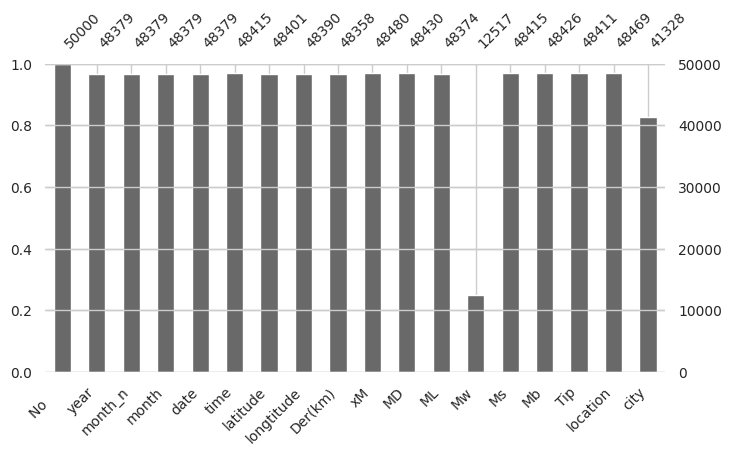

In [326]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

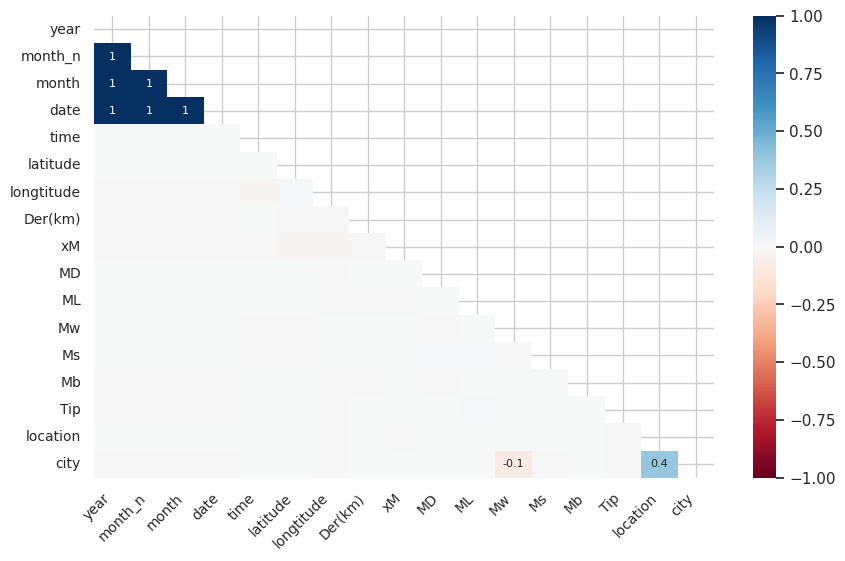

In [327]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

1.Verilerin Silinmesi:Verilerin silinmesi gereken durumlar doğal olmayan aykırı değerleri ifade eden nan değerlerinin silimesi için idealdir.


In [328]:
# gerekli olan sütünların silinmesi
df.drop(['Ms', 'Mb'], axis=1, inplace=True)


In [329]:
print('After Cleaning Rows:{} Columns:{}'.format(df.shape[0] , df.shape[1]))

After Cleaning Rows:50000 Columns:16


Verilerin Doldurulması:Verilerin uyun değerlerle doldurulmasının bazı kötü sonuçları olabilir. bunlar veride gerçek olmayan (yapay) verilerin ortaya çıkamasını sağlar.

In [330]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturmalıyım ,böylece eski dataframe değişmemiş olucak.
df_fillna = df.copy()

df_fillna.head(3)

No        year  month_n month       date                    time  latitude  \
0       1  2023.0      7.0  July 2023-07-31 2024-11-20 21:53:38.290   37.4153   
1       2  2023.0      7.0  July 2023-07-31 2024-11-20 15:23:16.850   38.1413   
2       3  2023.0      7.0  July 2023-07-31 2024-11-20 02:50:49.840   37.8352   

   longtitude  Der(km)   xM   MD   ML   Mw Tip  \
0     37.1703      4.0  3.5  0.0  3.5  3.4  Ke   
1     38.4340      5.2  3.5  0.0  3.5  3.4  Ke   
2     26.8353      6.2  3.0  NaN  3.0  0.0  Ke   

                                         location           city  
0  DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  Kahramanmaras  
1            AKSU-SINCIK (ADIYAMAN) [West 6.4 km]       Adiyaman  
2                        SISAM ADASI (EGE DENIZI)     Ege Denizi

In [331]:
df_fillna.isna().sum()

No                0
year           1621
month_n        1621
month          1621
date           1621
time           1585
latitude       1599
longtitude     1610
Der(km)        1642
xM             1520
MD             1570
ML             1626
Mw            37483
Tip            1589
location       1531
city           8672
dtype: int64

In [332]:
df_eksik=df_fillna.copy()

In [333]:
df[df.notnull().all(axis = 1)][:5]

No        year  month_n month       date                    time  latitude  \
0       1  2023.0      7.0  July 2023-07-31 2024-11-20 21:53:38.290   37.4153   
1       2  2023.0      7.0  July 2023-07-31 2024-11-20 15:23:16.850   38.1413   
3       4  2023.0      7.0  July 2023-07-30 2024-11-20 20:19:40.490   40.8085   
4       5  2023.0      7.0  July 2023-07-30 2024-11-20 16:13:52.620   38.1290   
6       7  2023.0      7.0  July 2023-07-30 2024-11-20 13:54:51.960   40.5722   

   longtitude  Der(km)   xM   MD   ML   Mw Tip  \
0     37.1703      4.0  3.5  0.0  3.5  3.4  Ke   
1     38.4340      5.2  3.5  0.0  3.5  3.4  Ke   
3     31.0183      5.3  3.1  0.0  3.1  3.1  Ke   
4     38.1863      2.4  3.0  0.0  3.0  0.0  Ke   
6     30.7302      2.1  3.0  0.0  3.0  2.9  Ke   

                                            location           city  
0     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  Kahramanmaras  
1               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]       Adiyaman  
3       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]          Duzce  
4  CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]       Adiyaman  
6     KAYABASI-AKYAZI (SAKARYA) [North East  0.6 km]        Sakarya

Nan değerleri kolonların nan değerleri ile doldurmayı tercih ettim çünkü  diğer mod medyan ile doldurmam daha fazla yapay veri oluşturacağını düşündüğüm için.

In [334]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_latitude = df_fillna['latitude'].mean()

df_fillna['latitude'].fillna(value = mean_latitude, inplace = True)

df_fillna.isna().sum()

/tmp/ipykernel_30/1677476252.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['latitude'].fillna(value = mean_latitude, inplace = True)


No                0
year           1621
month_n        1621
month          1621
date           1621
time           1585
latitude          0
longtitude     1610
Der(km)        1642
xM             1520
MD             1570
ML             1626
Mw            37483
Tip            1589
location       1531
city           8672
dtype: int64

In [335]:
# Sadece sayısal sütunları seçiyoruz
to_be_filled = df.select_dtypes(include='number').columns  # Sayısal sütunların isimleri

# Döngü ile her sütunda eksik değerleri dolduruyoruz
for col in to_be_filled:
    df[col].fillna(df[col].mean(), inplace=True)

# Eksik değerlerin sayısını kontrol ediyoruz
print(df.isna().sum())



No               0
year             0
month_n          0
month         1621
date          1621
time          1585
latitude         0
longtitude       0
Der(km)          0
xM               0
MD               0
ML               0
Mw               0
Tip           1589
location      1531
city          8672
dtype: int64


/tmp/ipykernel_30/405377633.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [336]:
df.describe().T

count                           mean  \
No          50000.0                        25000.5   
year        50000.0                     2009.17212   
month_n     50000.0                       6.201182   
date          48379  2009-08-23 18:57:20.980590592   
time          48415     2024-11-20 12:02:43.578944   
latitude    50000.0                      38.299823   
longtitude  50000.0                      32.959221   
Der(km)     50000.0                       9.994915   
xM          50000.0                       3.345165   
MD          50000.0                       1.922947   
ML          50000.0                        1.46551   
Mw          50000.0                        2.87521   

                                   min                            25%  \
No                                 1.0                       12500.75   
year                            1994.0                         2004.0   
month_n                            1.0                            3.0   
date               1994-09-11 00:00:00            2004-02-19 00:00:00   
time        2024-11-20 00:00:00.040000  2024-11-20 05:39:26.304999936   
latitude                          35.0                        37.2465   
longtitude                        26.0                        27.8488   
Der(km)                            0.0                            5.0   
xM                                 3.0                            3.1   
MD                                 0.0                            0.0   
ML                                 0.0                            0.0   
Mw                                 0.0                        2.87521   

                                   50%                         75%  \
No                             25000.5                    37500.25   
year                            2009.0                      2015.0   
month_n                            6.0                         9.0   
date               2008-11-05 00:00:00         2015-10-27 00:00:00   
time        2024-11-20 12:06:08.420000  2024-11-20 18:23:53.200000   
latitude                     38.299823                     39.2094   
longtitude                    31.09865                     37.7474   
Der(km)                            7.0                        10.2   
xM                                 3.2                         3.5   
MD                                 3.0                         3.2   
ML                                 0.0                         3.2   
Mw                             2.87521                     2.87521   

                                   max           std  
No                             50000.0  14433.901067  
year                            2023.0       7.84295  
month_n                           12.0       3.43381  
date               2023-07-31 00:00:00           NaN  
time        2024-11-20 23:59:58.220000           NaN  
latitude                       41.9982      1.440866  
longtitude                     44.9992      5.653154  
Der(km)                          154.7     12.389518  
xM                                 7.7      0.390287  
MD                                 6.7      1.587988  
ML                                 7.5      1.703844  
Mw                                 7.7      0.704822

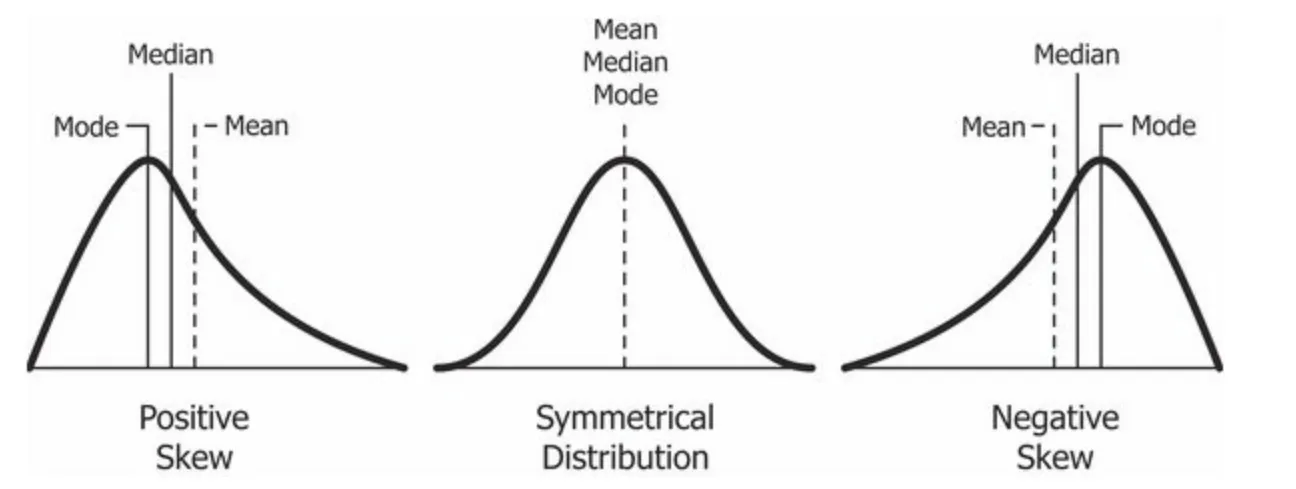

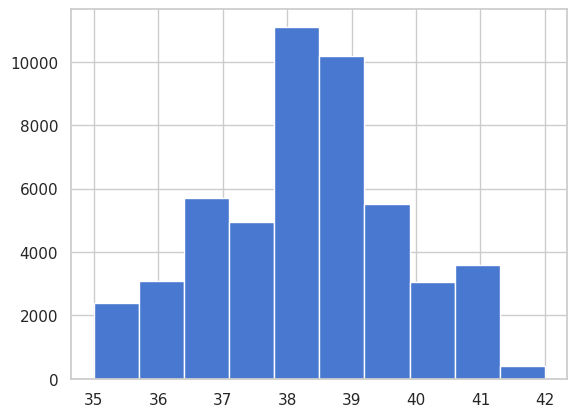

In [337]:
plt.hist(df['latitude'])
plt.show()



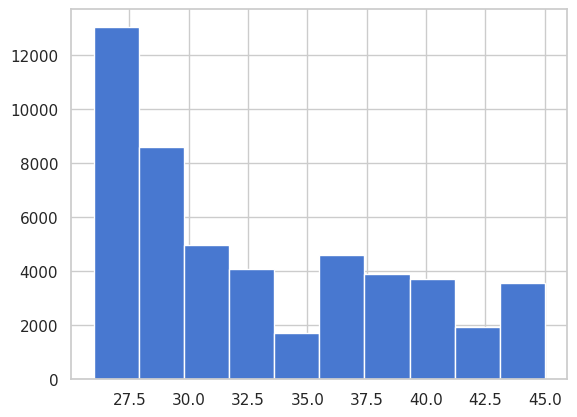

In [338]:
plt.hist(df['longtitude'])
plt.show()

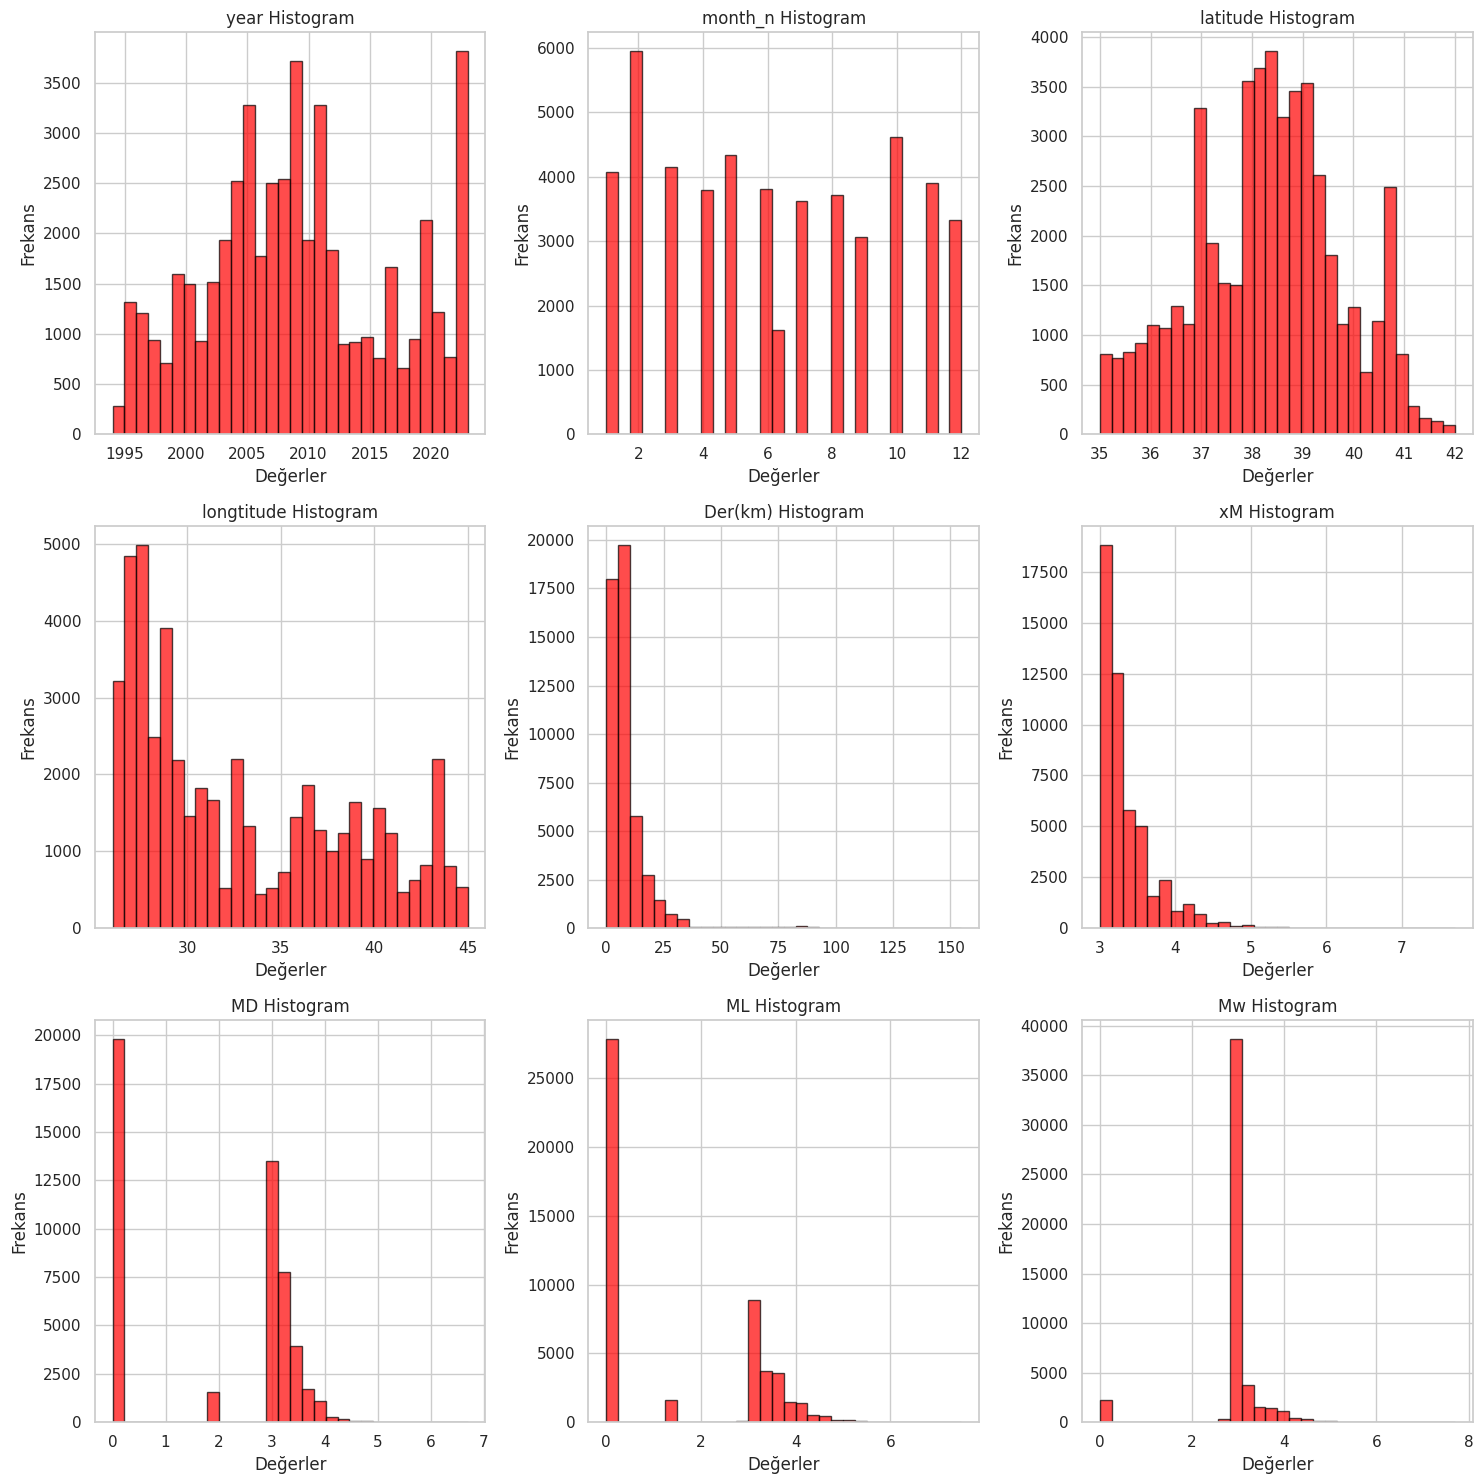

In [339]:
# Sayısal sütunların her biri için histogram çizimi
def plot_numeric_columns_histograms(df):
    numeric_columns = df.select_dtypes(include=['number']).columns  # Sayısal sütunları seç
    numeric_columns = numeric_columns[1:]
    num_columns = len(numeric_columns)  # Toplam sayısal sütun sayısı
    
    # Alt grafiklerin düzeni (örneğin, 3 sütun)
    rows = (num_columns + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Alt grafiklerin kolay erişimi için düzleştirme

    for i, column in enumerate(numeric_columns):
        ax = axes[i]
        ax.hist(df[column], bins=30, alpha=0.7, color='red', edgecolor='black')
        ax.set_title(f'{column} Histogram')
        ax.set_xlabel('Değerler')
        ax.set_ylabel('Frekans')
    
    # Gereksiz boş grafik alanlarını kaldır
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

plot_numeric_columns_histograms(df)


Kategorik Değişkenlerin Doldurulması

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   No          50000 non-null  int64         
 1   year        50000 non-null  float64       
 2   month_n     50000 non-null  float64       
 3   month       48379 non-null  category      
 4   date        48379 non-null  datetime64[ns]
 5   time        48415 non-null  datetime64[ns]
 6   latitude    50000 non-null  float64       
 7   longtitude  50000 non-null  float64       
 8   Der(km)     50000 non-null  float64       
 9   xM          50000 non-null  float64       
 10  MD          50000 non-null  float64       
 11  ML          50000 non-null  float64       
 12  Mw          50000 non-null  float64       
 13  Tip         48411 non-null  category      
 14  location    48469 non-null  category      
 15  city        41328 non-null  category      
dtypes: category(4), dateti

Aslında bu mod değeriyle doldurulması tarihin aynı tarihte fazladan veriler ortaya çıkartıyor en doğrusu ml ile beraber değerler ile doldurulması ve bu değerler  bir günde olduğunda çok daha fazla depremin oldyuğunu gösteriyor 

In [341]:
# Kategorik bir değişkenin mod değeriyle doldurulması

# date_mode değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df['date'].isna().sum()

# date_mode değişkeninde en çok tekrar eden değeri(mode) alalım.
date_mode = df['date'].mode()

# date_mode değişkenini mode değeri ile dolduralım.
df['date'] = df['date'].fillna(value = date_mode[0])

# date_mode değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df.isna().sum()

No               0
year             0
month_n          0
month         1621
date             0
time          1585
latitude         0
longtitude       0
Der(km)          0
xM               0
MD               0
ML               0
Mw               0
Tip           1589
location      1531
city          8672
dtype: int64

In [342]:
df[["time"]][:20]

time
0  2024-11-20 21:53:38.290
1  2024-11-20 15:23:16.850
2  2024-11-20 02:50:49.840
3  2024-11-20 20:19:40.490
4  2024-11-20 16:13:52.620
5  2024-11-20 15:13:16.850
6  2024-11-20 13:54:51.960
7  2024-11-20 21:21:03.220
8  2024-11-20 21:15:49.120
9  2024-11-20 18:53:34.400
10                     NaT
11 2024-11-20 10:20:10.030
12 2024-11-20 10:09:33.700
13 2024-11-20 06:03:04.230
14 2024-11-20 05:33:44.970
15 2024-11-20 21:59:00.280
16 2024-11-20 17:38:55.960
17 2024-11-20 08:32:51.340
18 2024-11-20 06:29:04.680
19 2024-11-20 05:38:26.290

In [343]:
print(df.columns)


Index(['No    ', 'year', 'month_n', 'month', 'date', 'time', 'latitude',
       'longtitude', 'Der(km)', 'xM', 'MD', 'ML', 'Mw', 'Tip', 'location',
       'city'],
      dtype='object')


In [344]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# time_mode değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df['time'].isna().sum()

# time_mode değişkeninde en çok tekrar eden değeri(mode) alalım.
time_mode = df['time'].mode()

# time_mode değişkenini mode değeri ile dolduralım.
df['time'] = df['time'].fillna(value = time_mode[0])

# time_mode değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df.isna().sum()

No               0
year             0
month_n          0
month         1621
date             0
time             0
latitude         0
longtitude       0
Der(km)          0
xM               0
MD               0
ML               0
Mw               0
Tip           1589
location      1531
city          8672
dtype: int64

In [345]:
# "Tip" sütunundaki eksik değerleri bir önceki geçerli değerle doldur
df["Tip"] = df["Tip"].fillna(method="ffill")


/tmp/ipykernel_30/1225565778.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Tip"] = df["Tip"].fillna(method="ffill")


In [346]:
df.isna().sum()

No               0
year             0
month_n          0
month         1621
date             0
time             0
latitude         0
longtitude       0
Der(km)          0
xM               0
MD               0
ML               0
Mw               0
Tip              0
location      1531
city          8672
dtype: int64

In [347]:
#eksik değerleri sonraki gelen değerle dolduruyoruz
df["location"] = df["location"].fillna(method="bfill")
df.isna().sum()

/tmp/ipykernel_30/1699893603.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["location"] = df["location"].fillna(method="bfill")


No               0
year             0
month_n          0
month         1621
date             0
time             0
latitude         0
longtitude       0
Der(km)          0
xM               0
MD               0
ML               0
Mw               0
Tip              0
location         0
city          8672
dtype: int64

In [348]:
#eksik değerleri sonraki gelen değerle dolduruyoruz
#df["month"] = df["month"].fillna(method="bfill")
#df.isna().sum()

In [349]:
#eksik değerleri sonraki gelen değerle dolduruyoruz
df["city"] = df["city"].fillna(method="bfill")
df.isna().sum()

/tmp/ipykernel_30/2393133344.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["city"] = df["city"].fillna(method="bfill")


No               0
year             0
month_n          0
month         1621
date             0
time             0
latitude         0
longtitude       0
Der(km)          0
xM               0
MD               0
ML               0
Mw               0
Tip              0
location         0
city             0
dtype: int64

 Kategorik Kırılım İle Doldurma İşlemi

In [350]:
df_categorical_fillna = df_eksik.copy()

df_categorical_fillna.isna().sum()

No                0
year           1621
month_n        1621
month          1621
date           1621
time           1585
latitude       1599
longtitude     1610
Der(km)        1642
xM             1520
MD             1570
ML             1626
Mw            37483
Tip            1589
location       1531
city           8672
dtype: int64

In [351]:
#Bu kod parçasının amacı, bir "Tip" sütununa göre gruplanan değerlerin ortalamasını kullanarak eksik değerleri doldurmaktır. 
df_categorical_fillna["xM"].fillna(value = df_categorical_fillna.groupby("Tip")["xM"].transform("mean"),inplace = True)

/tmp/ipykernel_30/689805209.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_categorical_fillna["xM"].fillna(value = df_categorical_fillna.groupby("Tip")["xM"].transform("mean"),inplace = True)
/tmp/ipykernel_30/689805209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical_fillna["xM"].fillna(value = df_categorical_fi

In [352]:
df_categorical_fillna.isna().sum()

No                0
year           1621
month_n        1621
month          1621
date           1621
time           1585
latitude       1599
longtitude     1610
Der(km)        1642
xM               55
MD             1570
ML             1626
Mw            37483
Tip            1589
location       1531
city           8672
dtype: int64

In [353]:
# kategorik değerlerin ikisininde nan olduğu satırları buluyor.
df_categorical_fillna[df_categorical_fillna[["Tip", "xM"]].isna().all(axis=1)][["Tip", "xM"]]

Tip  xM
1925   NaN NaN
2510   NaN NaN
4038   NaN NaN
4174   NaN NaN
6570   NaN NaN
8465   NaN NaN
9089   NaN NaN
10142  NaN NaN
10343  NaN NaN
10727  NaN NaN
13066  NaN NaN
13964  NaN NaN
14029  NaN NaN
15349  NaN NaN
15358  NaN NaN
15543  NaN NaN
15789  NaN NaN
16378  NaN NaN
17606  NaN NaN
17706  NaN NaN
17905  NaN NaN
21430  NaN NaN
21976  NaN NaN
22023  NaN NaN
22551  NaN NaN
24552  NaN NaN
31900  NaN NaN
33402  NaN NaN
33902  NaN NaN
34086  NaN NaN
35361  NaN NaN
35750  NaN NaN
36477  NaN NaN
36769  NaN NaN
37159  NaN NaN
37990  NaN NaN
38149  NaN NaN
38478  NaN NaN
38798  NaN NaN
39718  NaN NaN
40351  NaN NaN
41184  NaN NaN
41374  NaN NaN
42758  NaN NaN
43518  NaN NaN
44296  NaN NaN
44429  NaN NaN
45390  NaN NaN
45671  NaN NaN
46628  NaN NaN
46947  NaN NaN
47445  NaN NaN
48442  NaN NaN
49249  NaN NaN
49423  NaN NaN

In [354]:
# xm değerinin nan oldu satırları getiriyor.
df_categorical_fillna[df_categorical_fillna['xM'].isnull()]

No        year  month_n      month       date                    time  \
1925     1926  2023.0      2.0   February 2023-02-15 2024-11-20 15:12:11.630   
2510     2511  2023.0      2.0   February 2023-02-09 2024-11-20 11:11:26.050   
4038     4039  2022.0     11.0   November 2022-11-16 2024-11-20 16:06:32.260   
4174     4175  2022.0      9.0  September 2022-09-20 2024-11-20 23:36:42.130   
6570     6571  2020.0     10.0    October 2020-10-30 2024-11-20 13:31:10.660   
8465     8466  2019.0      9.0  September 2019-09-12 2024-11-20 06:17:06.240   
9089     9090  2019.0      2.0   February 2019-02-08 2024-11-20 12:28:56.260   
10142   10143  2017.0      8.0     August 2017-08-15 2024-11-20 17:14:59.090   
10343   10344  2017.0      7.0       July 2017-07-27 2024-11-20 13:36:13.340   
10727   10728  2017.0      6.0       June 2017-06-17 2024-11-20 20:01:50.680   
13066   13067  2015.0      4.0      April 2015-04-17 2024-11-20 01:50:44.190   
13964   13965  2014.0      5.0        May 2014-05-24 2024-11-20 10:05:17.930   
14029   14030  2014.0      4.0      April 2014-04-29 2024-11-20 08:28:44.190   
15349   15350  2012.0     11.0   November 2012-11-26 2024-11-20 04:17:32.630   
15358   15359     NaN      NaN        NaN        NaT                     NaT   
15543   15544  2012.0     10.0    October 2012-10-13                     NaT   
15789   15790  2012.0      8.0     August 2012-08-04 2024-11-20 22:38:06.250   
16378   16379  2012.0      4.0      April 2012-04-24 2024-11-20 14:23:00.610   
17606   17607  2011.0     11.0   November 2011-11-12 2024-11-20 00:27:26.860   
17706   17707  2011.0     11.0   November 2011-11-07 2024-11-20 18:37:42.700   
17905   17906  2011.0     10.0    October 2011-10-31 2024-11-20 23:40:02.560   
21430   21431  2010.0      6.0       June 2010-06-03 2024-11-20 20:47:46.310   
21976   21977  2010.0      3.0      March 2010-03-10 2024-11-20 02:09:22.020   
22023   22024  2010.0      3.0      March 2010-03-08 2024-11-20 11:16:52.480   
22551   22552  2009.0     12.0   December 2009-12-16 2024-11-20 09:36:34.610   
24552   24553  2009.0      1.0    January 2009-01-19 2024-11-20 10:40:29.010   
31900   31901  2005.0     12.0   December 2005-12-04 2024-11-20 00:13:32.070   
33402   33403     NaN      NaN        NaN        NaT 2024-11-20 23:31:31.150   
33902   33903  2005.0      5.0        May 2005-05-24 2024-11-20 01:00:59.900   
34086   34087  2005.0      4.0      April 2005-04-27 2024-11-20 12:44:54.500   
35361   35362  2004.0     11.0   November 2004-11-18 2024-11-20 07:59:12.700   
35750   35751  2004.0      9.0  September 2004-09-20 2024-11-20 01:03:14.400   
36477   36478  2004.0      7.0       July 2004-07-14 2024-11-20 01:14:02.800   
36769   36770  2004.0      5.0        May 2004-05-29 2024-11-20 00:52:16.300   
37159   37160  2004.0      4.0      April 2004-04-03 2024-11-20 07:49:39.500   
37990   37991  2003.0      9.0  September 2003-09-22 2024-11-20 19:05:44.100   
38149   38150  2003.0      8.0     August 2003-08-08 2024-11-20 07:26:58.000   
38478   38479  2003.0      6.0       June 2003-06-17 2024-11-20 22:23:45.900   
38798   38799  2003.0      5.0        May 2003-05-09 2024-11-20 22:12:54.300   
39718   39719  2002.0     12.0   December 2002-12-23 2024-11-20 18:45:05.700   
40351   40352  2002.0      7.0       July 2002-07-17 2024-11-20 23:23:35.500   
41184   41185  2002.0      2.0   February 2002-02-03 2024-11-20 08:29:51.500   
41374   41375  2001.0     10.0    October 2001-10-24 2024-11-20 20:18:54.800   
42758   42759  2000.0      9.0  September 2000-09-06 2024-11-20 00:49:58.500   
43518   43519  2000.0      3.0      March 2000-03-15 2024-11-20 07:41:16.000   
44296   44297  1999.0     10.0    October 1999-10-11 2024-11-20 14:26:34.300   
44429   44430  1999.0      9.0  September 1999-09-19 2024-11-20 18:19:53.200   
45390   45391  1999.0      1.0    January 1999-01-12 2024-11-20 22:03:30.800   
45671   45672  1998.0      9.0  September 1998-09-08 2024-11-20 03:34:34.200   
46628  

In [355]:
# xM sütununa göre gruplandır ve Der(km) sütununun ortalamasını hesaplıyor
Tip_mean_df = df_categorical_fillna.groupby("Tip", observed=False)["xM"].mean().to_frame()


In [356]:
print(Tip_mean_df)


           xM
Tip          
Ke   3.345633
Sm   3.063107


In [357]:
df_categorical_fillna.isna().sum()

No                0
year           1621
month_n        1621
month          1621
date           1621
time           1585
latitude       1599
longtitude     1610
Der(km)        1642
xM               55
MD             1570
ML             1626
Mw            37483
Tip            1589
location       1531
city           8672
dtype: int64

# 3.Kategorik Değişken Analizi

In [358]:
df_k = df_eksik.copy()
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   No          50000 non-null  int64         
 1   year        48379 non-null  float64       
 2   month_n     48379 non-null  float64       
 3   month       48379 non-null  category      
 4   date        48379 non-null  datetime64[ns]
 5   time        48415 non-null  datetime64[ns]
 6   latitude    48401 non-null  float64       
 7   longtitude  48390 non-null  float64       
 8   Der(km)     48358 non-null  float64       
 9   xM          48480 non-null  float64       
 10  MD          48430 non-null  float64       
 11  ML          48374 non-null  float64       
 12  Mw          12517 non-null  float64       
 13  Tip         48411 non-null  category      
 14  location    48469 non-null  category      
 15  city        41328 non-null  category      
dtypes: category(4), dateti

In [359]:
df_k_categorical = df.select_dtypes(include = "category")
df_k_categorical.head(3)

month Tip                                        location           city
0  July  Ke  DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  Kahramanmaras
1  July  Ke            AKSU-SINCIK (ADIYAMAN) [West 6.4 km]       Adiyaman
2  July  Ke                        SISAM ADASI (EGE DENIZI)     Ege Denizi

In [360]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_k_categorical["Tip"].unique()

['Ke', 'Sm']
Categories (2, object): ['Ke', 'Sm']

# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_k_categorical.columns:
    print(f'There are {df_k_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

In [361]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_k_categorical.columns:
    print(f'{df_k_categorical[col].value_counts()}\n', 5*"*********")

month
February     5948
October      4616
May          4333
March        4151
January      4070
November     3907
June         3811
April        3803
August       3716
July         3619
December     3334
September    3071
Name: count, dtype: int64
 *********************************************
Tip
Ke    49887
Sm      113
Name: count, dtype: int64
 *********************************************
location
AKDENIZ                                           4305
EGE DENIZI                                         991
ONIKI ADALAR (AKDENIZ)                             658
GÖKOVA KÖRFEZI (AKDENIZ)                           587
GOKOVA KORFEZI (AKDENIZ)                           496
                                                  ... 
GOYNUK-GEDIZ (KÜTAHYA) [North East  4.1 km]          1
GOYNUK-GEDIZ (KÜTAHYA) [North East  3.3 km]          1
GOYNUK-GEDIZ (KÜTAHYA) [North East  2.8 km]          1
GOYNUK-GEDIZ (KÜTAHYA) [North East  2.2 km]          1
KAMISLIK-SIVRICE (ELAZIG) [North East  1.9 km

3.1 Kategorik Değişkenlerde Görselleştirme İşlemleri

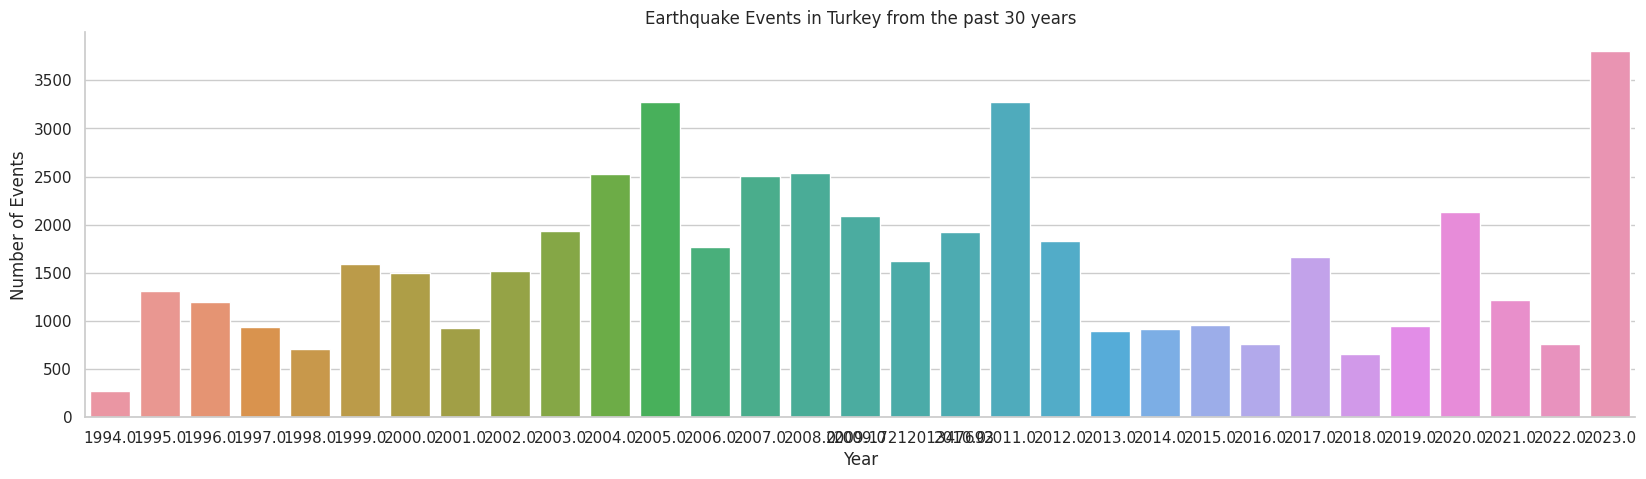

In [362]:
fig , ax  =plt.subplots(figsize = (20,5))


year_df = (
    df.groupby('year', as_index = False)
    .size()
)


sns.barplot(
    data = year_df
    ,x = 'year'
    ,y = 'size'
)

plt.gca().spines[['top','right']].set_visible(False)
plt.title('Earthquake Events in Turkey from the past 30 years')
plt.xlabel('Year')
plt.ylabel('Number of Events')

plt.show()

/tmp/ipykernel_30/2617444979.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['month_n', 'month', 'year'], as_index=False)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.

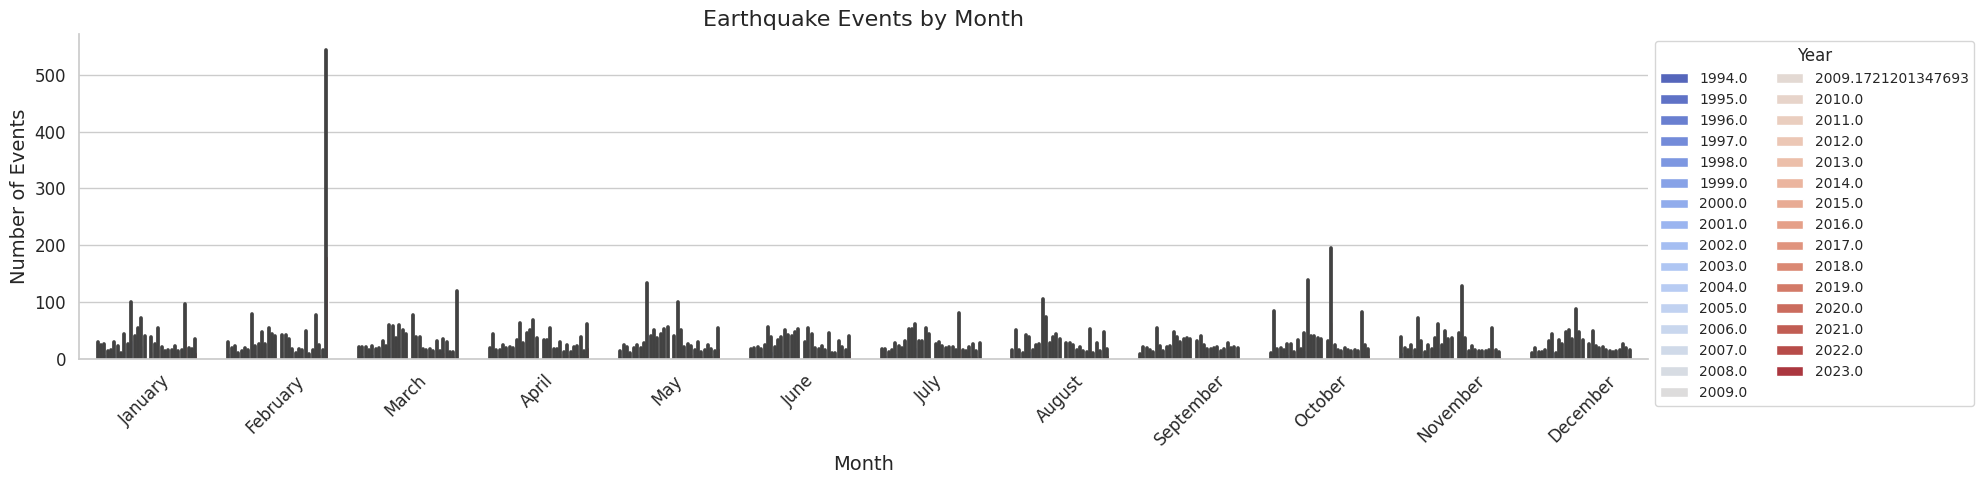

In [363]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ay sıralaması için 'month' sütununu kategorik olarak tanımlıyoruz
df['month'] = pd.Categorical(
    df['month'], 
    categories=list(calendar.month_name)[1:],  # Ocak'tan Aralık'a kadar ay isimleri
    ordered=True
)

# Gruplama ve sıralama
month_df = (
    df.groupby(['month_n', 'month', 'year'], as_index=False)
    .size()
    .sort_values(by=['month_n', 'year'])  # Ay numarasına ve yıla göre sıralama
)

# Grafik oluşturma
plt.figure(figsize=(20, 5))

sns.barplot(
    data=month_df,
    x='month',
    y='size',
    hue='year',
    palette="coolwarm",  # Daha belirgin bir renk paleti
)

# Grafik düzenlemeleri
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Earthquake Events by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Legend düzenlemeleri
plt.legend(
    title='Year', 
    bbox_to_anchor=(1, 1), 
    loc="upper left", 
    fontsize=10, 
    title_fontsize=12, 
    ncol=2
)

plt.tight_layout()
plt.show()


/tmp/ipykernel_30/2398761973.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('city', as_index=False)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


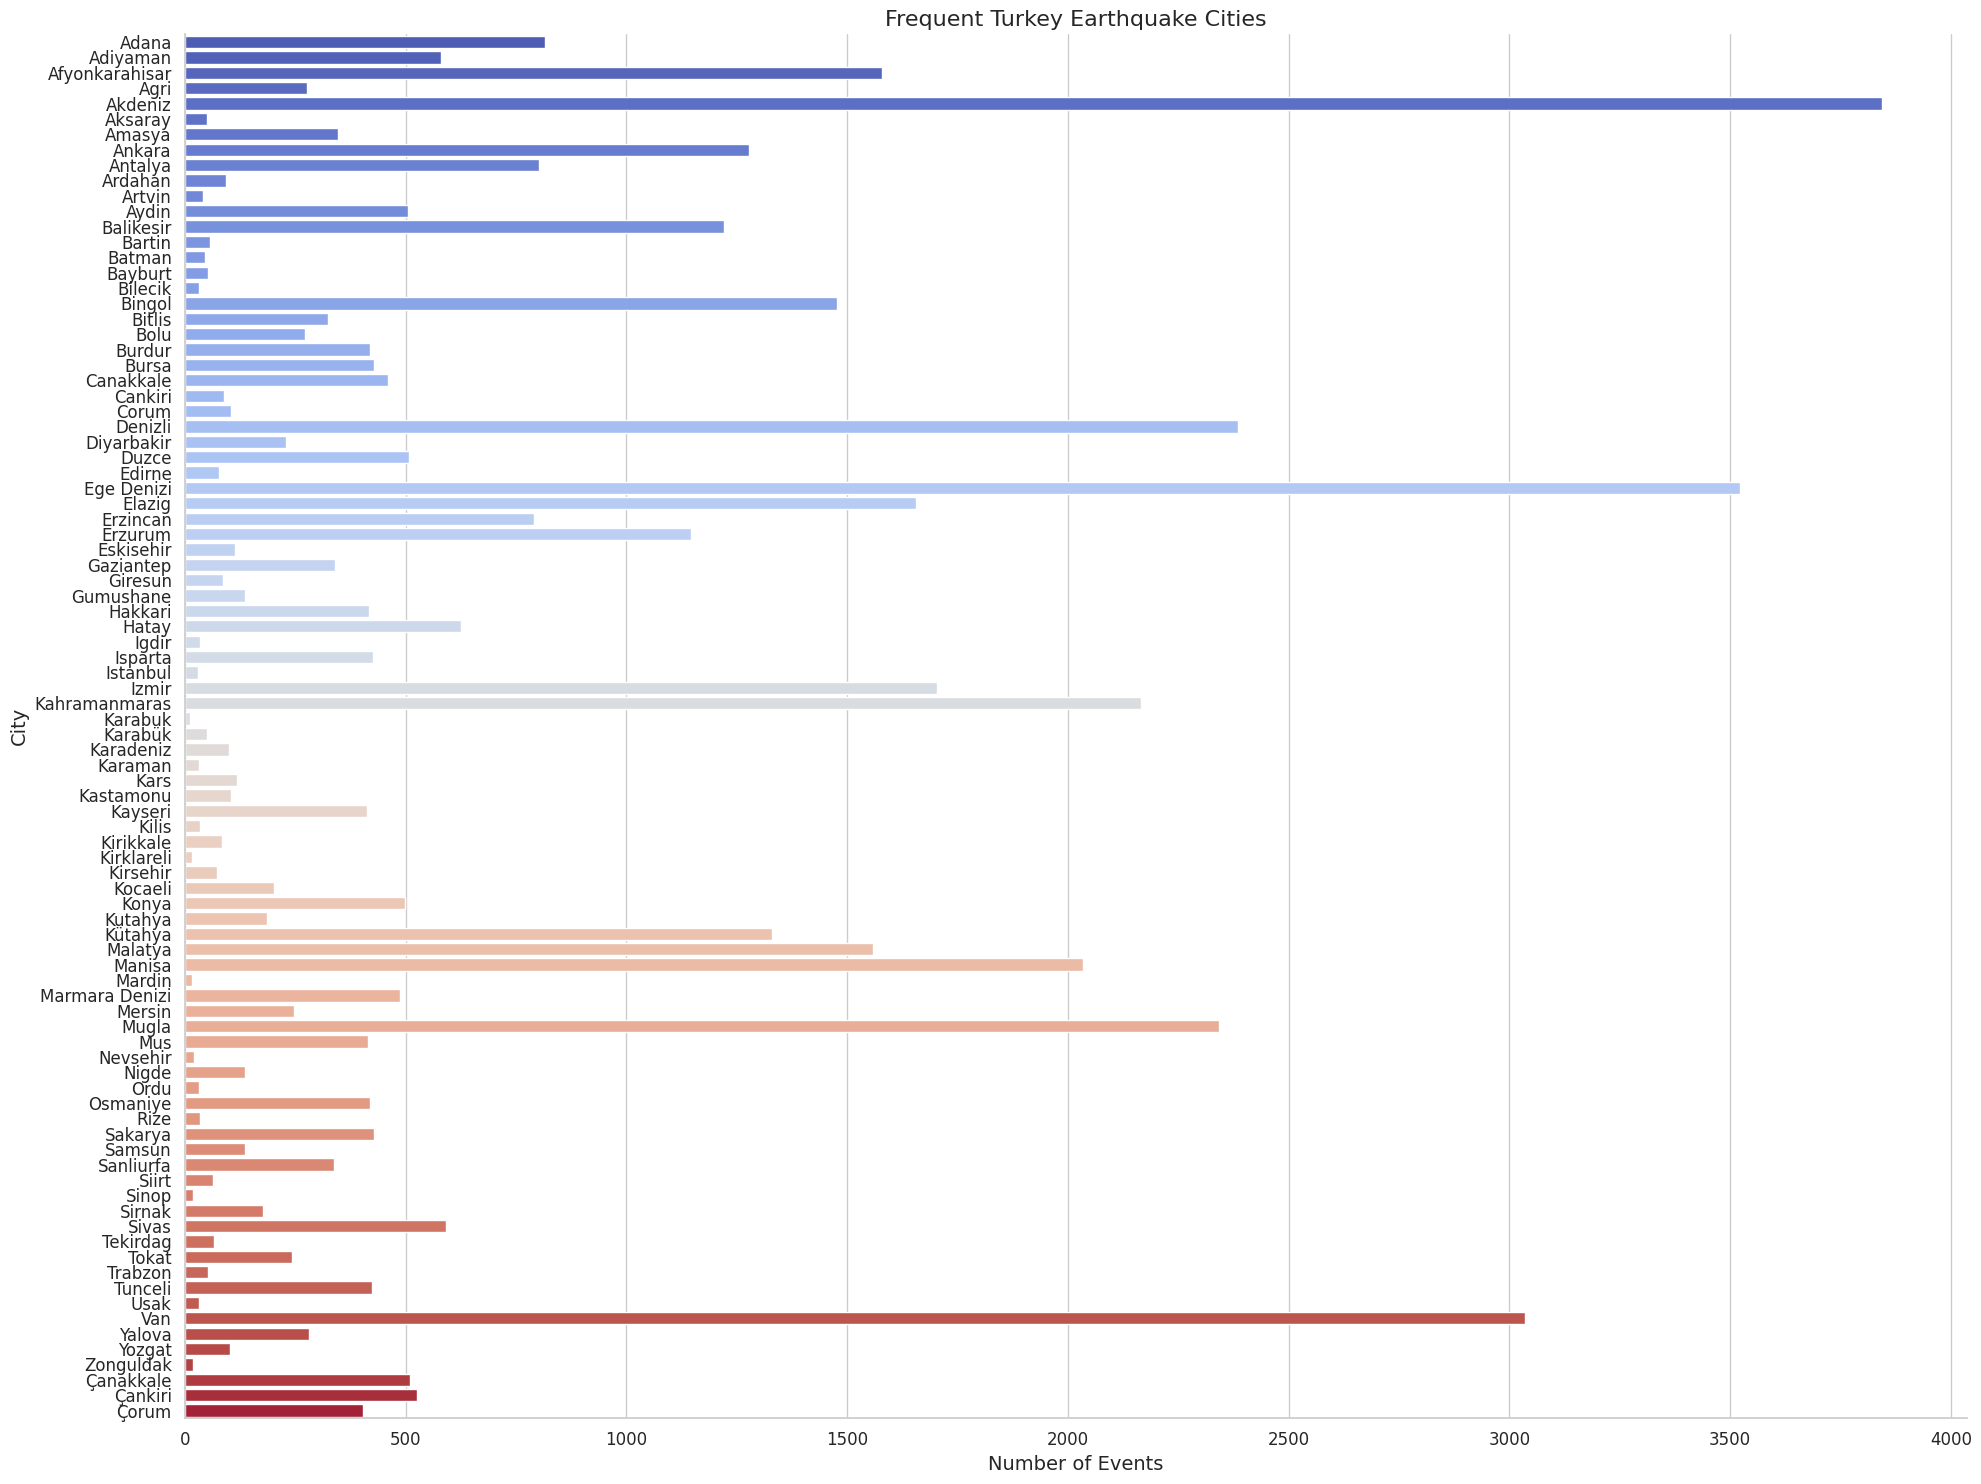

In [364]:
plt.figure(figsize=(20, 15))

# Veriyi gruplama ve sıralama
city_df = (
    df.groupby('city', as_index=False)
    .size()
    .sort_values('size', ascending=False)
)

# Şehir sıralamasını tersine çevirme (en fazla değeri üste getir)
city_df['city'] = pd.Categorical(
    city_df['city'], 
    categories=city_df['city'], 
    ordered=True
)

# Barplot
sns.barplot(
    data=city_df,
    y='city',
    x='size',
    palette="coolwarm"  # Daha belirgin bir renk paleti için
)

# Grafik düzenlemeleri
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Frequent Turkey Earthquake Cities', fontsize=16)
plt.xlabel('Number of Events', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


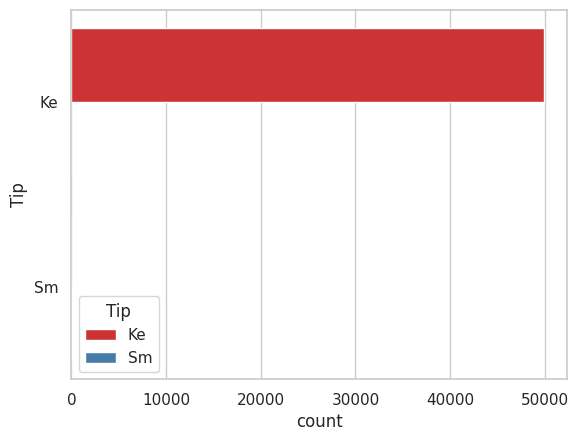

In [365]:
sns.countplot(data = df,
              y = "Tip",
              hue = "Tip",
              order = df["Tip"].value_counts().index,
              palette = "Set1");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


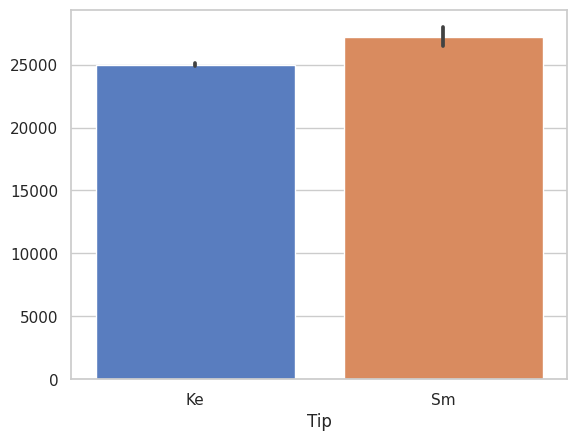

In [366]:
sns.barplot(data = df, x = "Tip", y = df.Tip.index);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


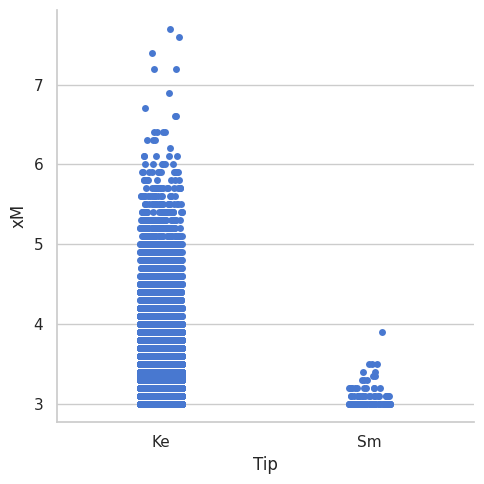

In [367]:
sns.catplot(data = df,
            x = "Tip",
            y = "xM");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 2000x500 with 0 Axes>

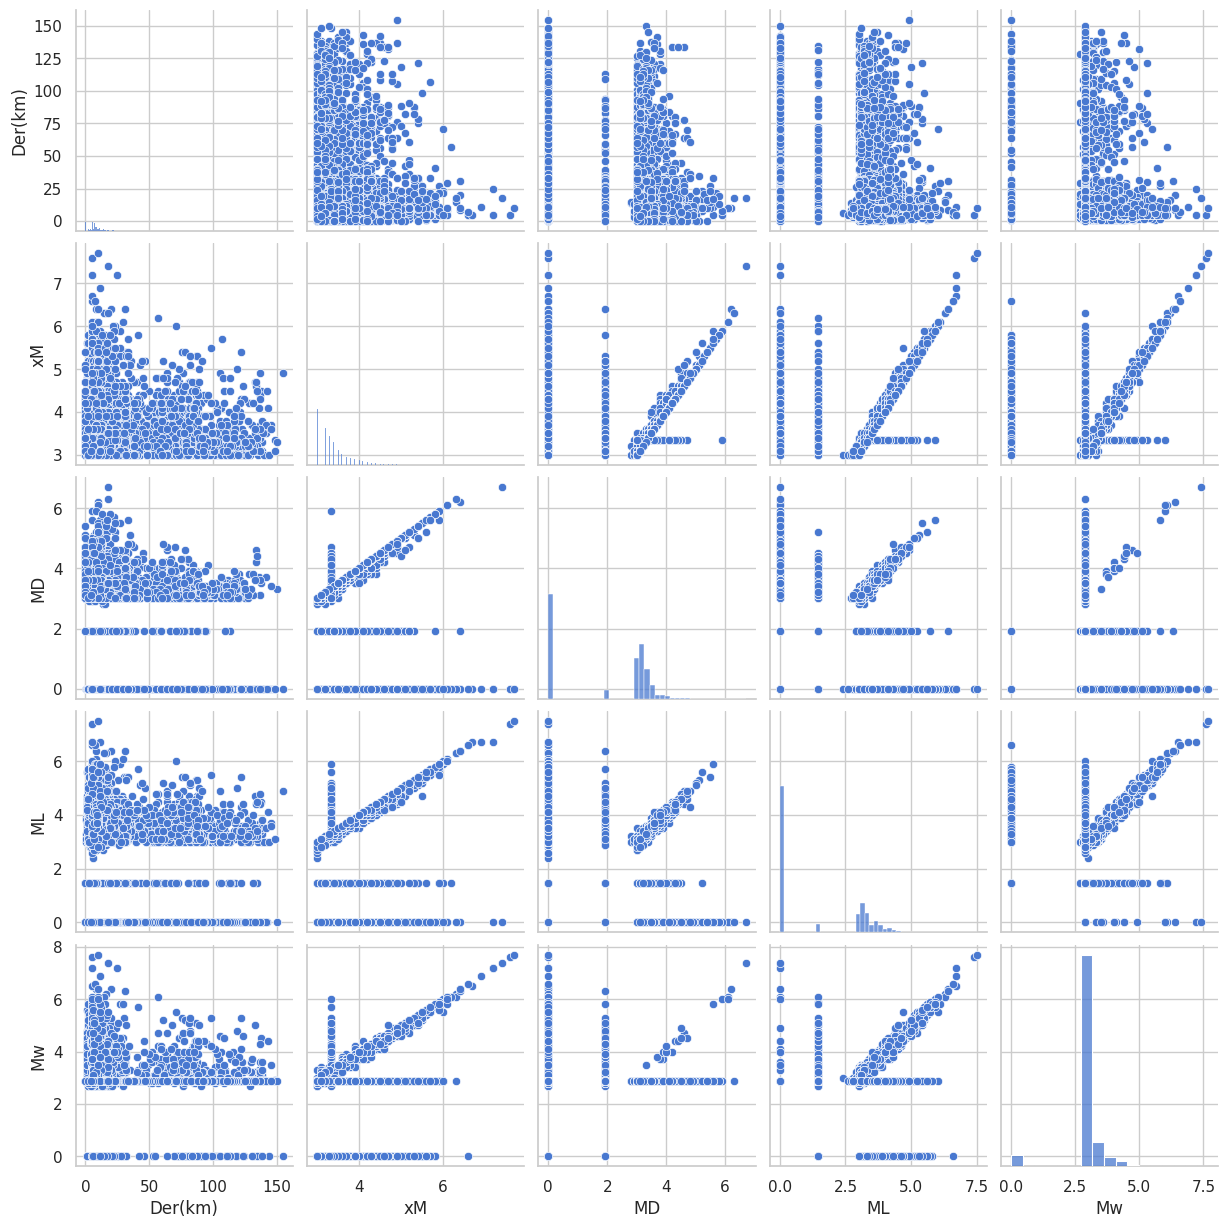

In [368]:
num_cols = ["Der(km)","xM","MD","ML",'Mw']


plt.figure(figsize = (20,5))

sns.pairplot(
    data = df[num_cols]
)

plt.show()

In [369]:
# Örnek sütun adı: 'Der(km)'
min_value = df['Der(km)'].min()
max_value = df['Der(km)'].max()

print(f"En küçük değer: {min_value}")
print(f"En büyük değer: {max_value}")


En küçük değer: 0.0
En büyük değer: 154.7


In [370]:
# En küçük değere sahip satır(lar)
min_row = df[df['Der(km)'] == min_value]

# En büyük değere sahip satır(lar)
max_row = df[df['Der(km)'] == max_value]

print("En küçük değere sahip satır(lar):")
print(min_row)

print("\nEn büyük değere sahip satır(lar):")
print(max_row)


En küçük değere sahip satır(lar):
       No        year  month_n      month       date                    time  \
42226   42227  2000.0     12.0   December 2000-12-31 2024-11-20 18:51:35.300   
42227   42228  2000.0     12.0   December 2000-12-31 2024-11-20 10:15:41.000   
42228   42229  2000.0     12.0   December 2000-12-31 2024-11-20 09:35:40.500   
42231   42232  2000.0     12.0   December 2000-12-31 2024-11-20 03:28:23.200   
42236   42237  2000.0     12.0   December 2000-12-30 2024-11-20 13:19:26.400   
...       ...     ...      ...        ...        ...                     ...   
49982   49983  1994.0      9.0  September 1994-09-23 2024-11-20 01:46:46.700   
49983   49984  1994.0      9.0  September 1994-09-22 2024-11-20 22:50:49.500   
49985   49986  1994.0      9.0  September 1994-09-20 2024-11-20 18:48:46.900   
49986   49987  1994.0      9.0  September 1994-09-20 2024-11-20 11:32:15.700   
49987   49988  1994.0      9.0  September 1994-09-20 2024-11-20 01:20:53.000   

     

In [371]:
#sayısal bir sütünü kategorik değere dönüştürme.
# Kategorik sınıflar ve aralıklar
bins = [0, 50, 100, 155]  # Sınırlardaki değerler
labels = ["sığ", "orta", "derin"]  # Kategorik etiketler

# 'Der(km)' sütununu kategorik değerlere dönüştürme
df['depth_category'] = pd.cut(df['Der(km)'], bins=bins, labels=labels, include_lowest=True)

# Yeni kategorik sütunu kontrol etme
print(df[['Der(km)', 'depth_category']].head())
print(df[['Der(km)', 'depth_category']].tail())


   Der(km) depth_category
0      4.0            sığ
1      5.2            sığ
2      6.2            sığ
3      5.3            sığ
4      2.4            sığ
       Der(km) depth_category
49995      4.0            sığ
49996      6.0            sığ
49997      2.0            sığ
49998     18.0            sığ
49999      4.0            sığ


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


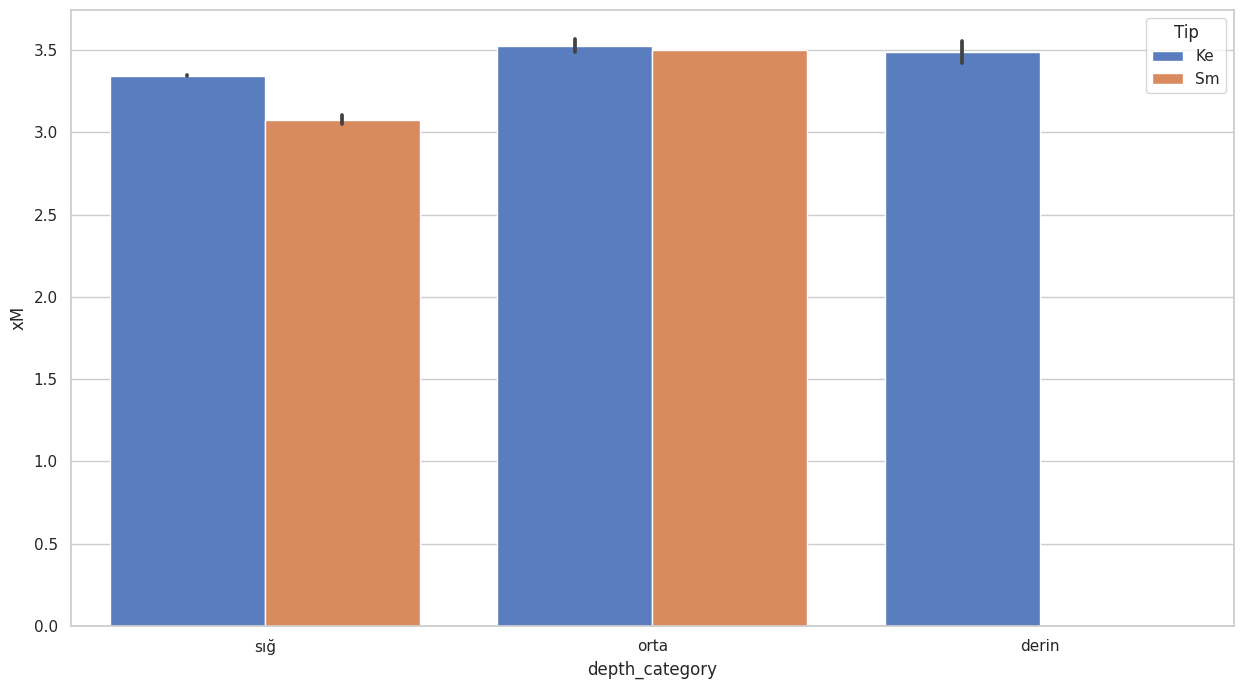

In [372]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "depth_category",
            y = "xM",
            hue = "Tip");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


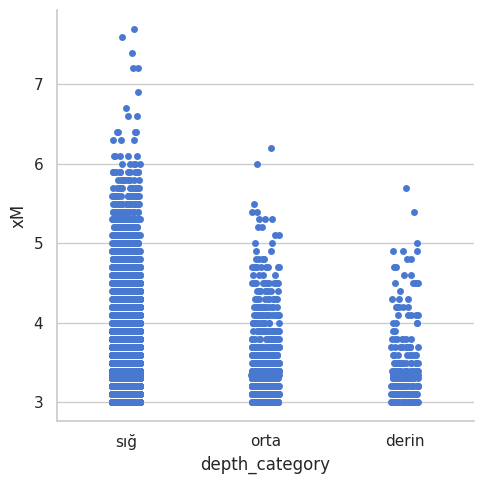

In [373]:
#deriniğin şiddete oranı
sns.catplot(data = df,
            x = "depth_category",
            y = "xM");

In [374]:
def plot_city_depth_distribution(dataframe, city_name, city_col='city', depth_col='depth_category'):

    # Seçilen şehre ait verileri filtreleme
    city_data = dataframe[dataframe[city_col] == city_name]

    # Eğer şehir verisi yoksa uyarı ver
    if city_data.empty:
        print(f"Uyarı: '{city_name}' şehri için veri bulunamadı!")
        return

    # Deprem kategorileri için veri gruplama
    city_depth_category = (
        city_data.groupby(depth_col)
        .size()
        .reset_index(name='count')
    )

    # Grafik Çizimi
    plt.figure(figsize=(12, 8))
    sns.barplot(data=city_depth_category, x=depth_col, y='count', palette='viridis')

    # Grafik Özelleştirme
    plt.title(f"{city_name} Şehri İçin Deprem Derinlik Kategorileri", fontsize=16)
    plt.xlabel("Derinlik Kategorisi", fontsize=14)
    plt.ylabel("Deprem Sayısı", fontsize=14)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()


/tmp/ipykernel_30/3997103366.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_data.groupby(depth_col)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


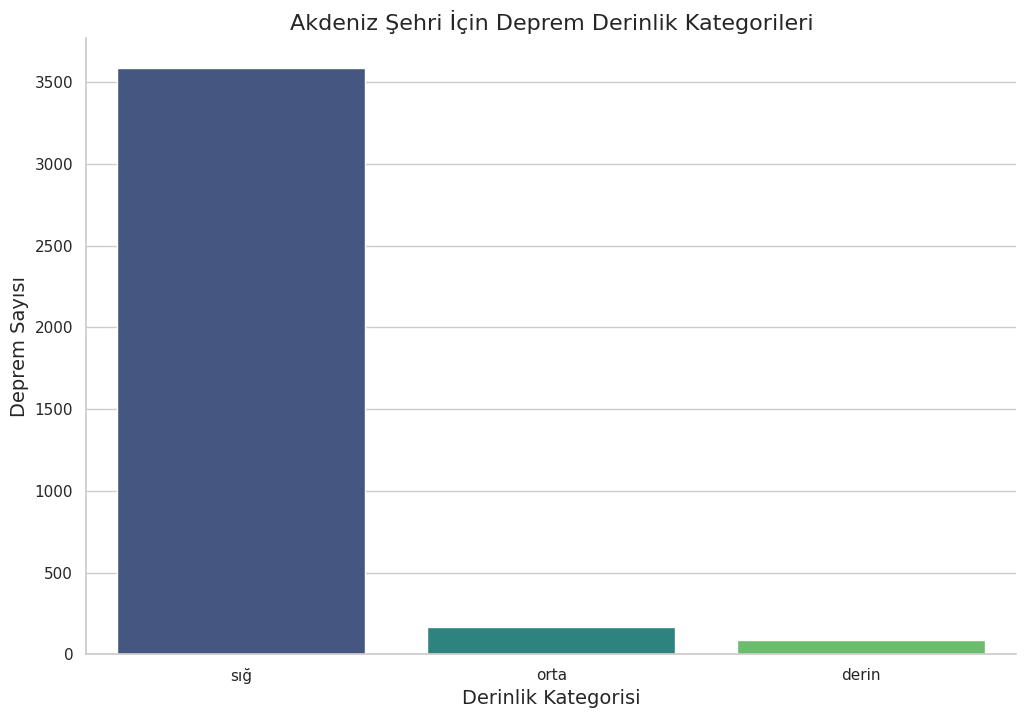

In [375]:
plot_city_depth_distribution(
    dataframe=df, 
    city_name='Akdeniz'
)

# 4.Sürekli Değişken Analizi

In [376]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

No        year  month_n  latitude  longtitude  Der(km)   xM        MD   ML  \
0       1  2023.0      7.0   37.4153     37.1703      4.0  3.5  0.000000  3.5   
1       2  2023.0      7.0   38.1413     38.4340      5.2  3.5  0.000000  3.5   
2       3  2023.0      7.0   37.8352     26.8353      6.2  3.0  1.922947  3.0   
3       4  2023.0      7.0   40.8085     31.0183      5.3  3.1  0.000000  3.1   
4       5  2023.0      7.0   38.1290     38.1863      2.4  3.0  0.000000  3.0   

    Mw  
0  3.4  
1  3.4  
2  0.0  
3  3.1  
4  0.0

In [377]:
df_numerical.describe().T

count          mean           std     min          25%  \
No          50000.0  25000.500000  14433.901067     1.0  12500.75000   
year        50000.0   2009.172120      7.842950  1994.0   2004.00000   
month_n     50000.0      6.201182      3.433810     1.0      3.00000   
latitude    50000.0     38.299823      1.440866    35.0     37.24650   
longtitude  50000.0     32.959221      5.653154    26.0     27.84880   
Der(km)     50000.0      9.994915     12.389518     0.0      5.00000   
xM          50000.0      3.345165      0.390287     3.0      3.10000   
MD          50000.0      1.922947      1.587988     0.0      0.00000   
ML          50000.0      1.465510      1.703844     0.0      0.00000   
Mw          50000.0      2.875210      0.704822     0.0      2.87521   

                     50%          75%         max  
No          25000.500000  37500.25000  50000.0000  
year         2009.000000   2015.00000   2023.0000  
month_n         6.000000      9.00000     12.0000  
latitude       38.299823     39.20940     41.9982  
longtitude     31.098650     37.74740     44.9992  
Der(km)         7.000000     10.20000    154.7000  
xM              3.200000      3.50000      7.7000  
MD              3.000000      3.20000      6.7000  
ML              0.000000      3.20000      7.5000  
Mw              2.875210      2.87521      7.7000

In [378]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [379]:
give_stats(dataframe = df)

**********No    **********
Mean value of No     is 25000.50
Std value of No     is 14433.90
Max value of No     is 50000
Min value of No     is 1
Count value of No     is 50000
Median value of No     is 25000.5

**********year**********
Mean value of year is 2009.17
Std value of year is 7.84
Max value of year is 2023.0
Min value of year is 1994.0
Count value of year is 50000
Median value of year is 2009.0

**********month_n**********
Mean value of month_n is 6.20
Std value of month_n is 3.43
Max value of month_n is 12.0
Min value of month_n is 1.0
Count value of month_n is 50000
Median value of month_n is 6.0

**********latitude**********
Mean value of latitude is 38.30
Std value of latitude is 1.44
Max value of latitude is 41.9982
Min value of latitude is 35.0
Count value of latitude is 50000
Median value of latitude is 38.29982338381438

**********longtitude**********
Mean value of longtitude is 32.96
Std value of longtitude is 5.65
Max value of longtitude is 44.9992
Min value of lon

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

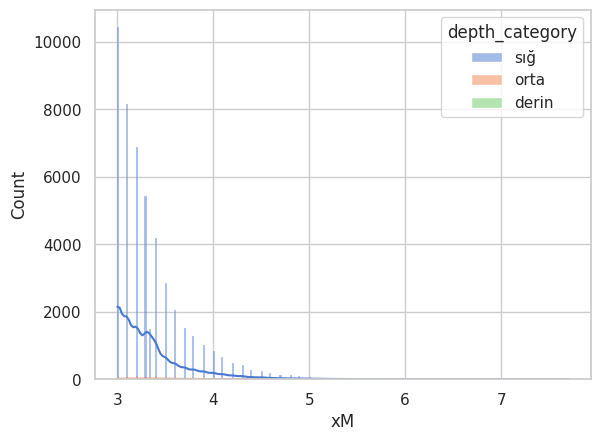

In [380]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "xM", kde = True, hue = "depth_category");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


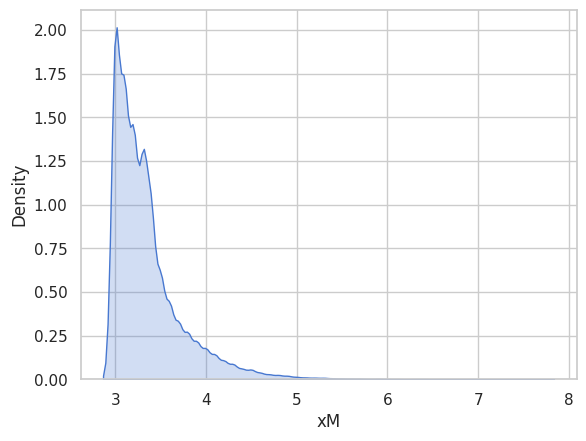

In [381]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['xM'], fill = True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


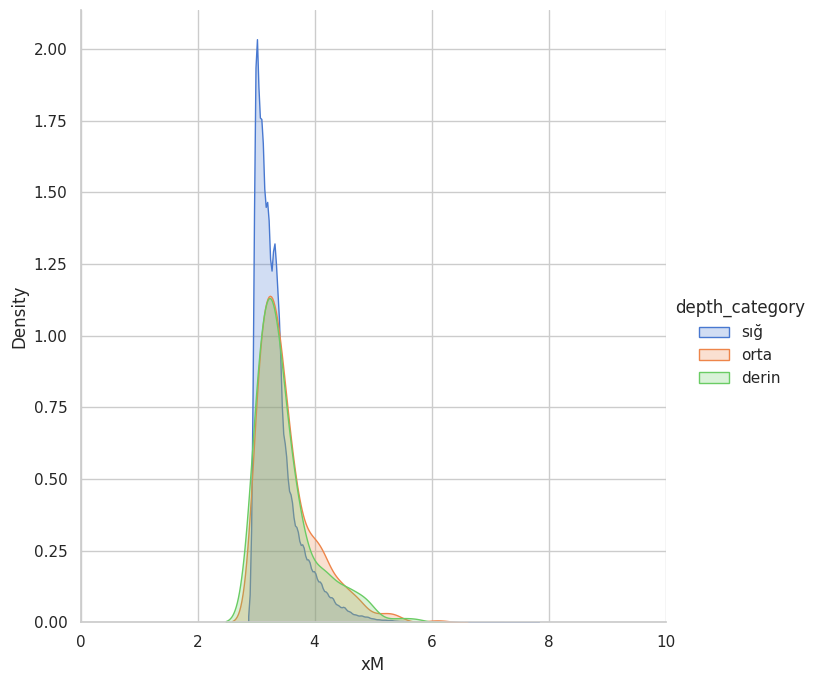

In [382]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data = df,
              hue = "depth_category",
              height = 7,
              xlim = (0, 10)).map(sns.kdeplot, "xM", fill = True).add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 1200x800 with 0 Axes>

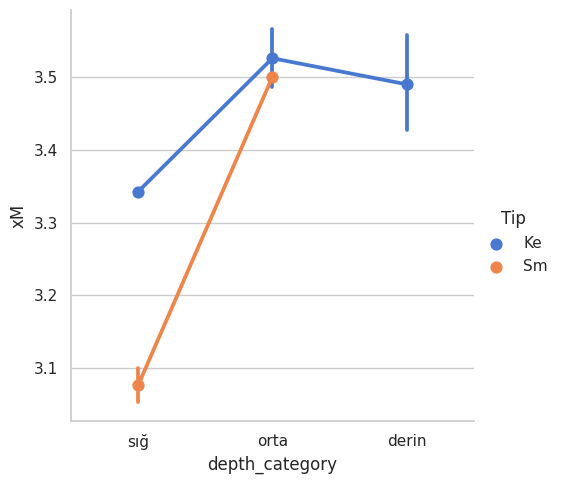

In [383]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "depth_category", y = "xM", hue = "Tip", kind = "point");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


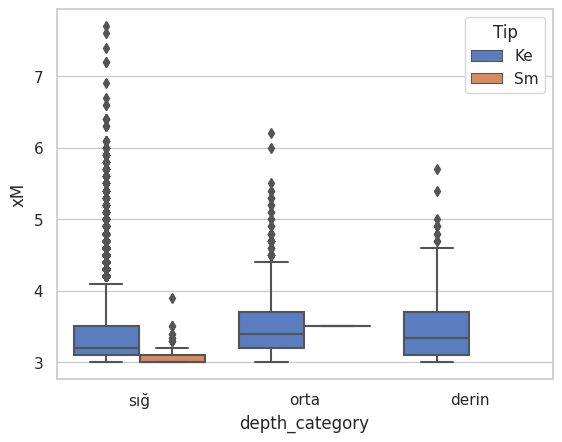

In [384]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "depth_category",
            y = "xM",
            hue = "Tip");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 1000x800 with 0 Axes>

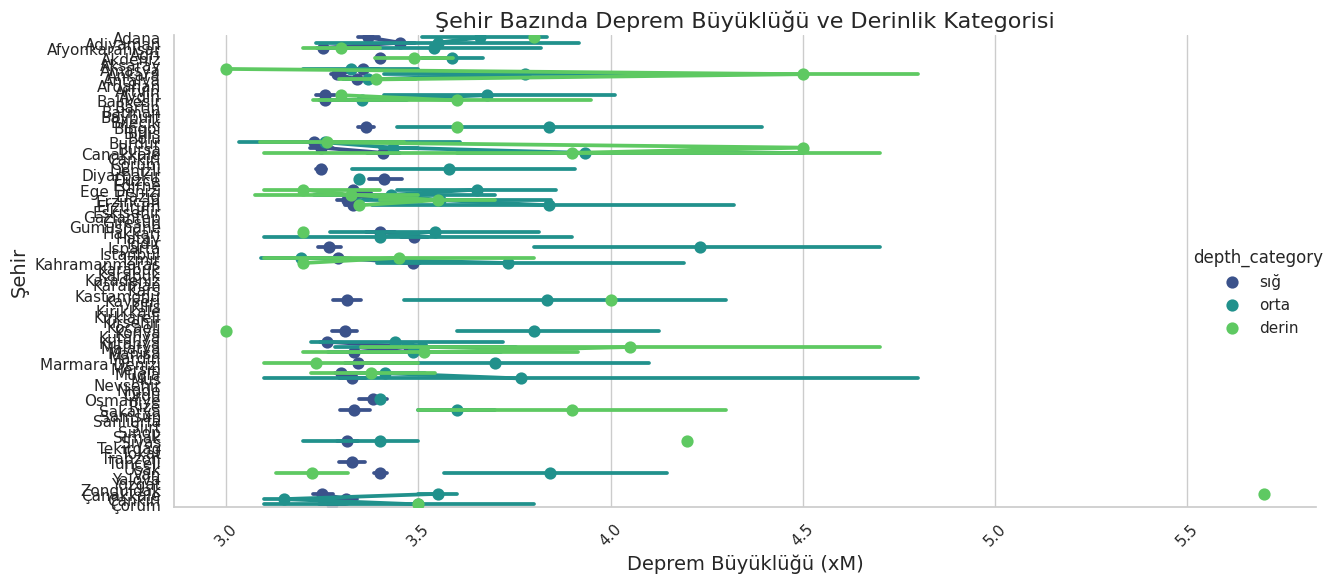

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

# En fazla deprem olan ilk 40 şehri seçelim
top_cities = df['city'].value_counts().head(40).index
filtered_data = df[df['city'].isin(top_cities)]

# Catplot grafiği
plt.figure(figsize=(10, 8))  # Grafik boyutunu artırdık
sns.catplot(
    data=filtered_data,
    x="xM",
    y="city",
    hue="depth_category",
    kind="point",
    height=6,
    aspect=2,
    palette="viridis"
)

# Şehir isimlerini döndürme
plt.xticks(rotation=45)
plt.title("Şehir Bazında Deprem Büyüklüğü ve Derinlik Kategorisi", fontsize=16)
plt.xlabel("Deprem Büyüklüğü (xM)", fontsize=14)
plt.ylabel("Şehir", fontsize=14)
plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağlar
plt.show()


In [386]:
# Farklı numerik görselleştirme işlemleri için iris veri setini yükleyelim.
iris = sns.load_dataset(name = "iris")
iris[:3]

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [387]:
print(df.columns)


Index(['No    ', 'year', 'month_n', 'month', 'date', 'time', 'latitude',
       'longtitude', 'Der(km)', 'xM', 'MD', 'ML', 'Mw', 'Tip', 'location',
       'city', 'depth_category'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

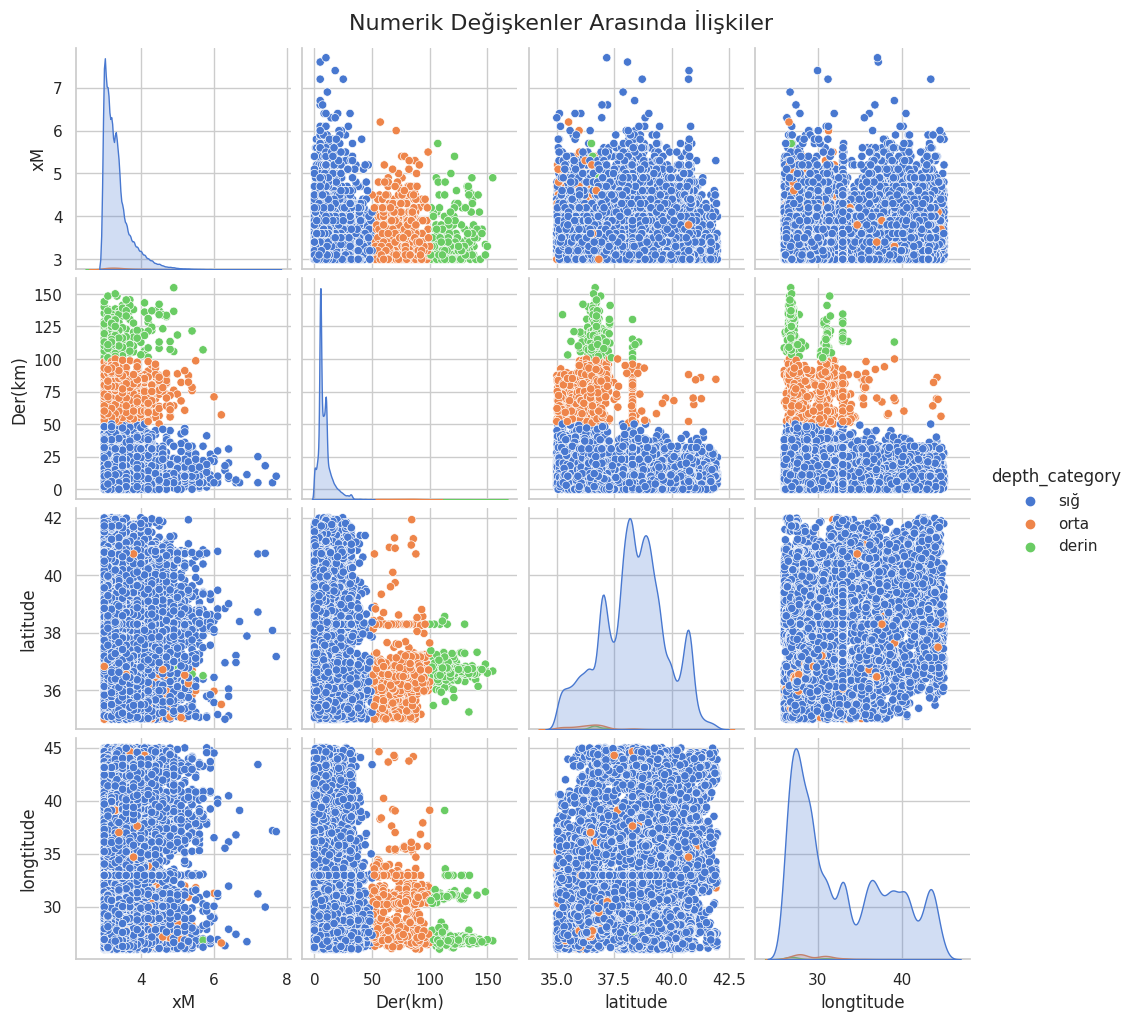

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunlar için Pairplot
sns.pairplot(data=df, hue="depth_category", vars=["xM", "Der(km)", "latitude", "longtitude"])

# Grafiği özelleştirme
plt.suptitle("Numerik Değişkenler Arasında İlişkiler", y=1.02, fontsize=16)
plt.show()


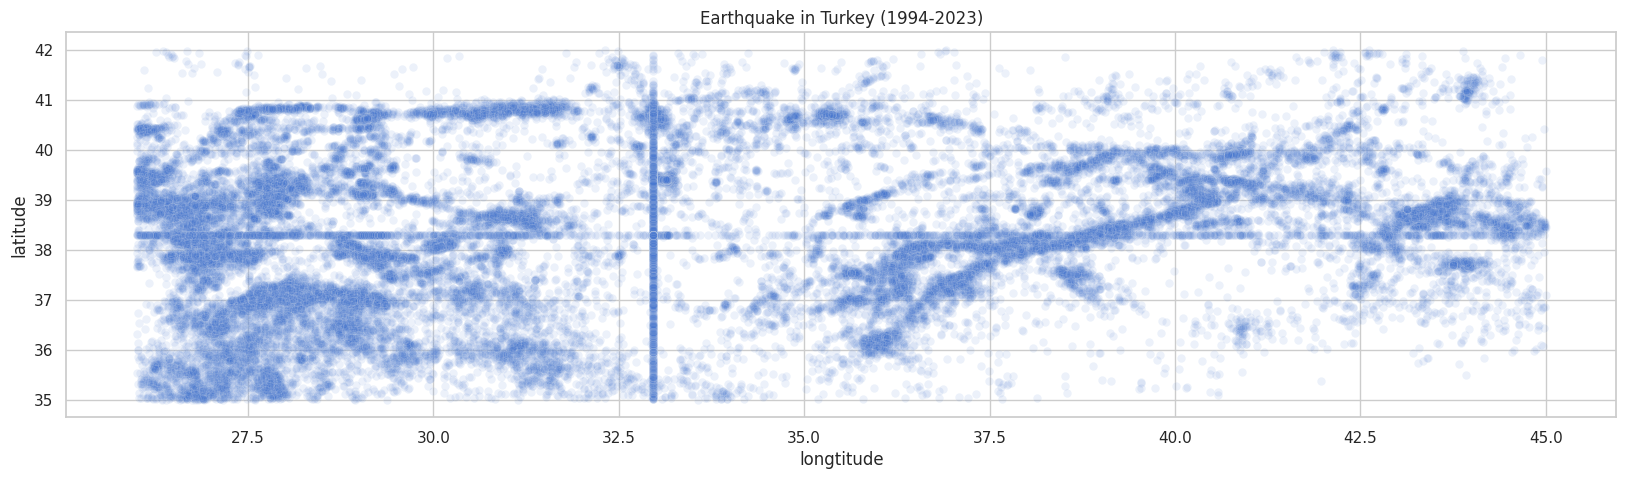

In [389]:
plt.figure(figsize = (20,5))
sns.scatterplot(
    data = df
    ,x = 'longtitude'
    ,y = 'latitude'
    ,alpha = 0.1
)

plt.title('Earthquake in Turkey (1994-2023)')
plt.show()

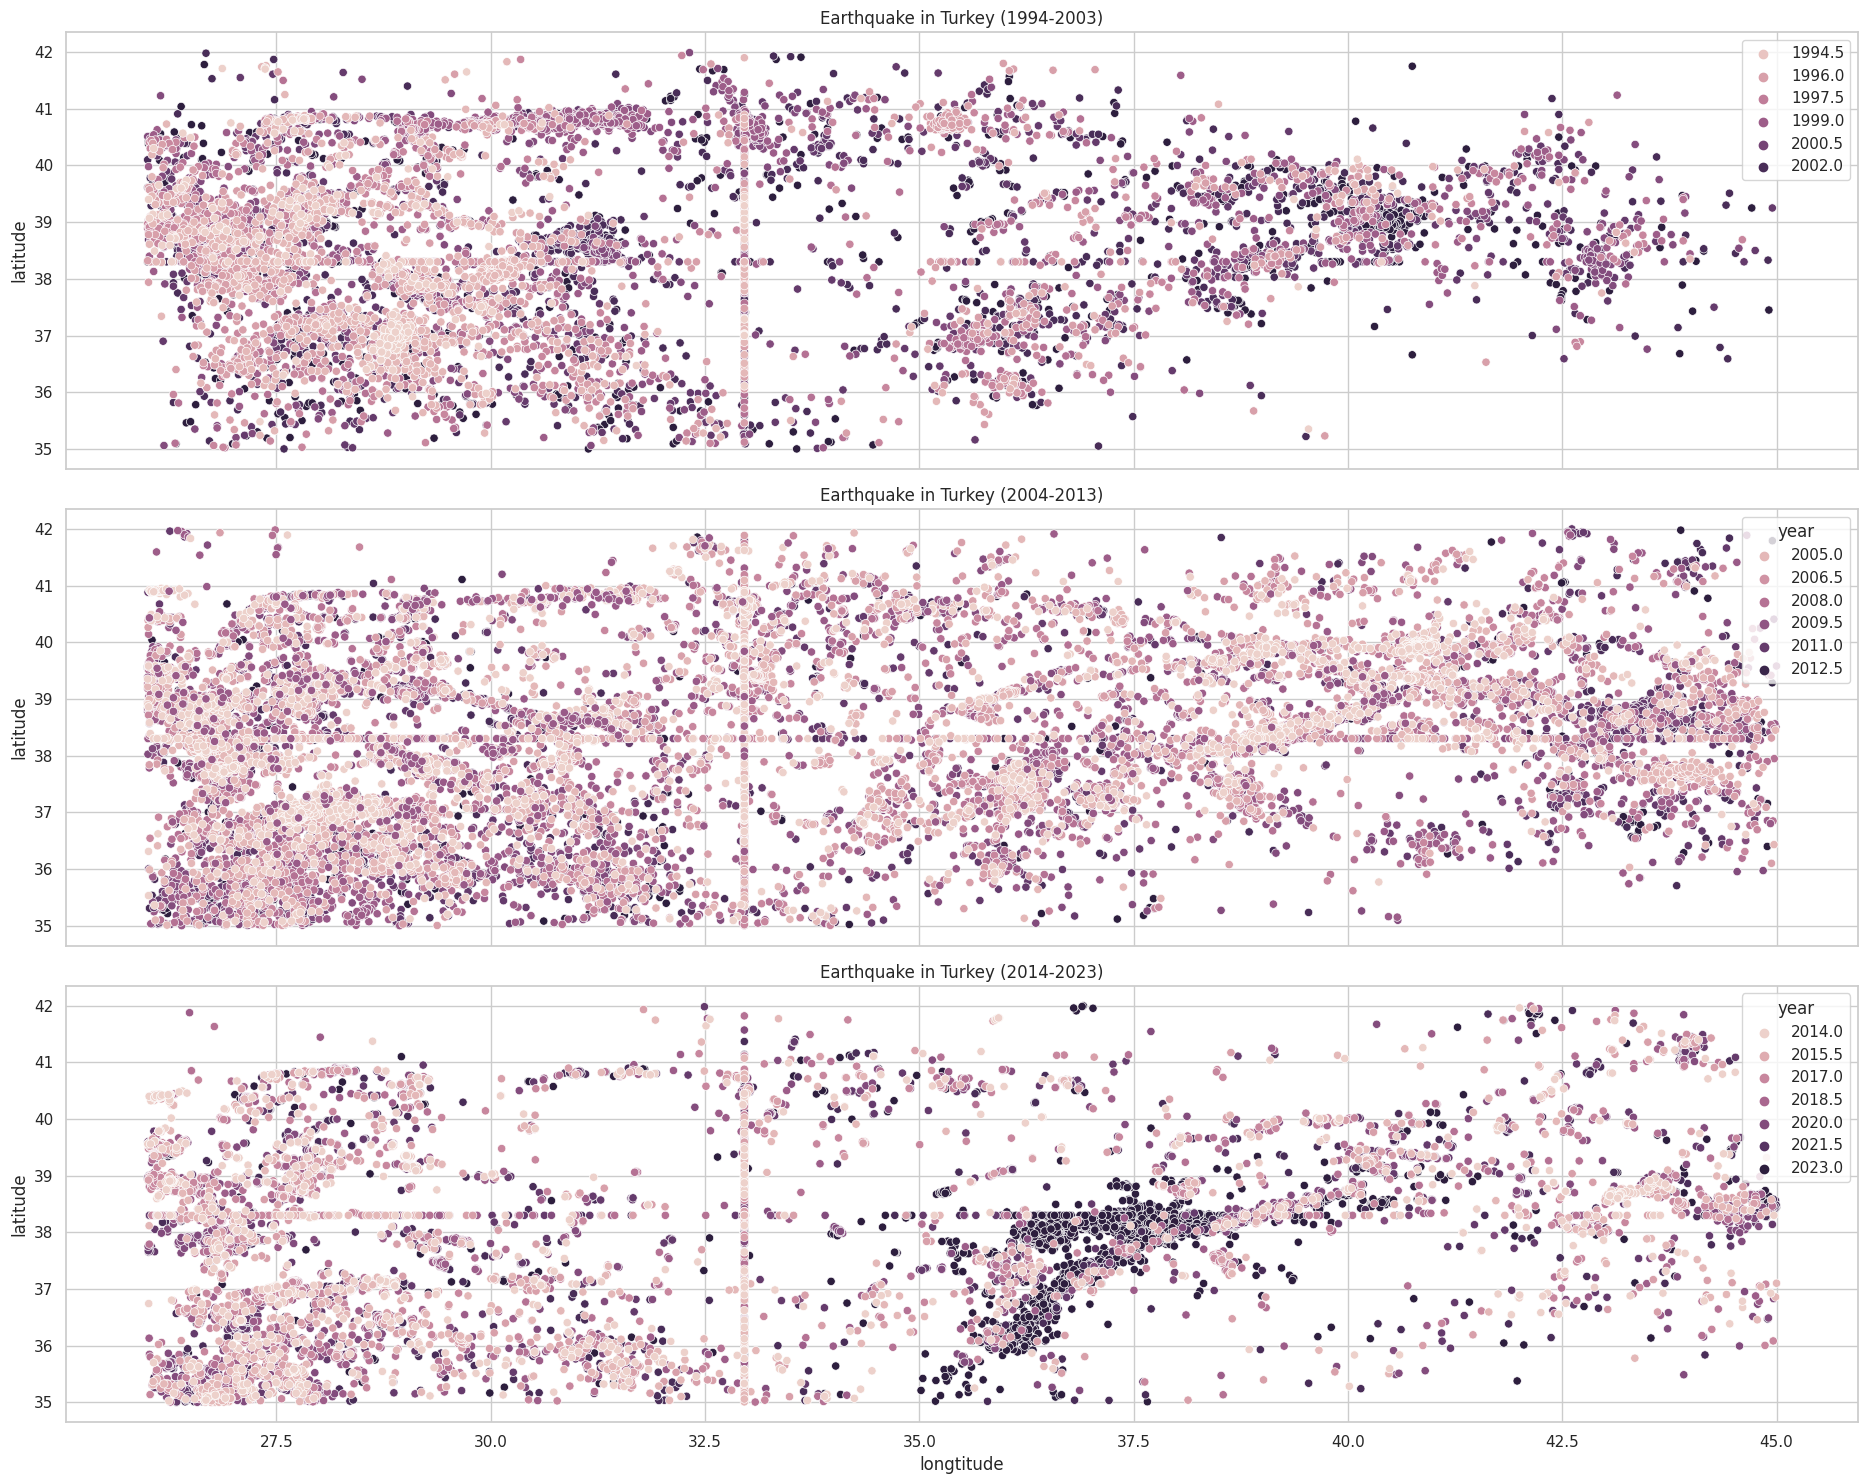

In [390]:
fig , ax = plt.subplots(3 , 1 ,  figsize = (20,15) , sharex = True , sharey = True)
sns.scatterplot(
    data = df.query('year >= 1994 & year < 2004')
    ,x = 'longtitude'
    ,y = 'latitude'
    ,hue = 'year'
    ,ax = ax[0]
)

ax[0].set_title('Earthquake in Turkey (1994-2003)')
ax[0].legend(bbox_to_anchor = (1,1))


sns.scatterplot(
    data = df.query('year > 2003 & year < 2014')
    ,x = 'longtitude'
    ,y = 'latitude'
    ,hue = 'year'
    ,ax = ax[1]
    
)

ax[1].set_title('Earthquake in Turkey (2004-2013)')

sns.scatterplot(
    data = df.query('year > 2013 & year <= 2023')
    ,x = 'longtitude'
    ,y = 'latitude'
    ,hue = 'year'
    ,ax = ax[2]
   
)

ax[2].set_title('Earthquake in Turkey (2014-2023)')

plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pa

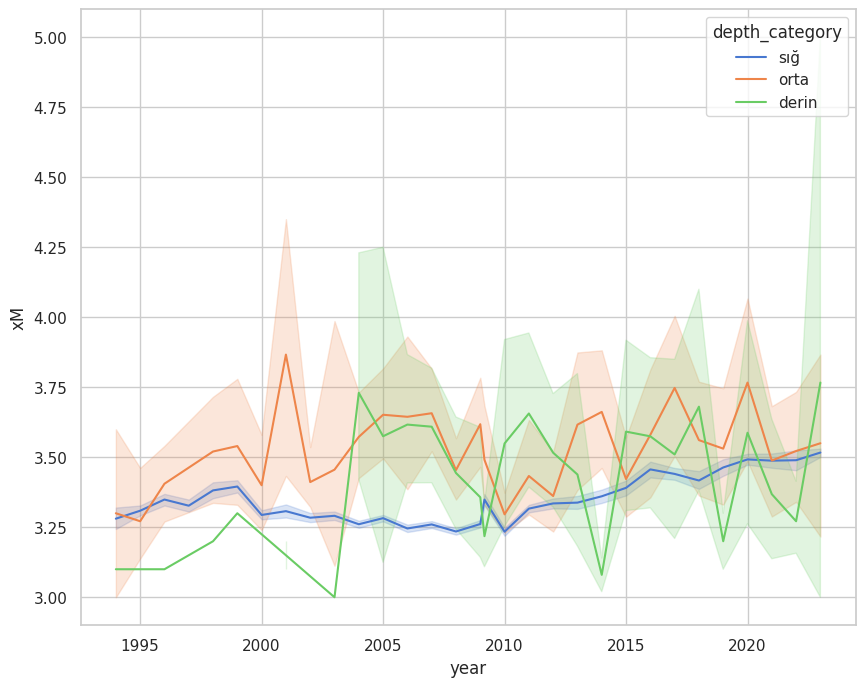

In [391]:
# Çizgi grafik ile numerik değişkenlerin tarihsel olarak değişimini gözlemleyebiliriz.
plt.figure(figsize = (10, 8))
sns.lineplot(data = df,
             x = "year",
             y = "xM",
             hue = "depth_category");

# 5. Aykırı Değer Analizi (Outliers)

In [392]:
df = df_.copy()

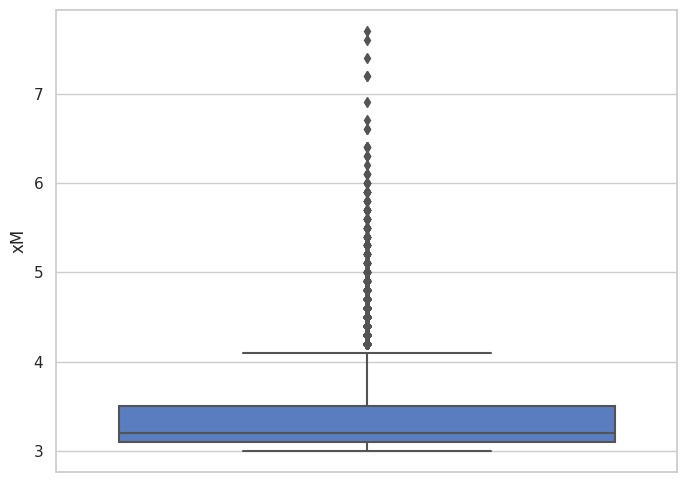

In [393]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["xM"],
            orient = "v");

In [394]:
df_xM = df['xM']
df_xM

0        3.5
1        3.5
2        3.0
3        3.1
4        3.0
        ... 
49995    3.0
49996    3.2
49997    3.0
49998    3.5
49999    3.1
Name: xM, Length: 50000, dtype: float64

In [395]:
# Quantile değerlerin belirlenmesi.
Q1 = df_xM.quantile(0.25)
Q3 = df_xM.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

3.1
3.5
0.3999999999999999


In [396]:
df_del = df[~(df_xM > upper_fence)]

df_del

No         Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  \
0           1  20230731215338  2023.07.31  21:53:38.29  37.4153  37.1703   
1           2  20230731152316  2023.07.31  15:23:16.85  38.1413  38.4340   
2           3  20230731025049  2023.07.31  02:50:49.84  37.8352  26.8353   
3           4  20230730201940  2023.07.30  20:19:40.49  40.8085  31.0183   
4           5  20230730161352  2023.07.30  16:13:52.62  38.1290  38.1863   
...       ...             ...         ...          ...      ...      ...   
49995   49996  19940916071148  1994.09.16  07:11:48.90  39.0500  27.9100   
49996   49997  19940915104046  1994.09.15  10:40:46.50  40.7500  30.6000   
49997   49998  19940913220202  1994.09.13  22:02:02.00  38.8500  26.9200   
49998   49999  19940913010048  1994.09.13  01:00:48.00  37.4200  30.0200   
49999   50000  19940911070348  1994.09.11  07:03:48.00  39.2900  29.1300   

       Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0          4.0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1          5.2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2          6.2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
3          5.3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4          2.4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
...        ...  ...  ...  ...  ...  ...  ...  ..   
49995      4.0  3.0  3.0  0.0  NaN  0.0  0.0  Ke   
49996      6.0  3.2  3.2  0.0  NaN  0.0  0.0  Ke   
49997      2.0  3.0  3.0  0.0  NaN  0.0  0.0  Ke   
49998     18.0  3.5  3.5  0.0  NaN  0.0  0.0  Ke   
49999      4.0  3.1  3.1  0.0  NaN  0.0  0.0  Ke   

                                                     Yer  
0         DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  
1                   AKSU-SINCIK (ADIYAMAN) [West 6.4 km]  
2                               SISAM ADASI (EGE DENIZI)  
3           ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]  
4      CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]  
...                                                  ...  
49995  ZEYTINLIBAG-AKHISAR (MANISA) [South West  0.4 km]  
49996     OSMANBEY-AKYAZI (SAKARYA) [North West  1.0 km]  
49997                      CANDARLI KÖRFEZI (EGE DENIZI)  
49998      PINARBASI-KEMER (BURDUR) [South West  4.2 km]  
49999       KABAKLAR-EMET (KÜTAHYA) [North East  2.2 km]  

[47559 rows x 15 columns]

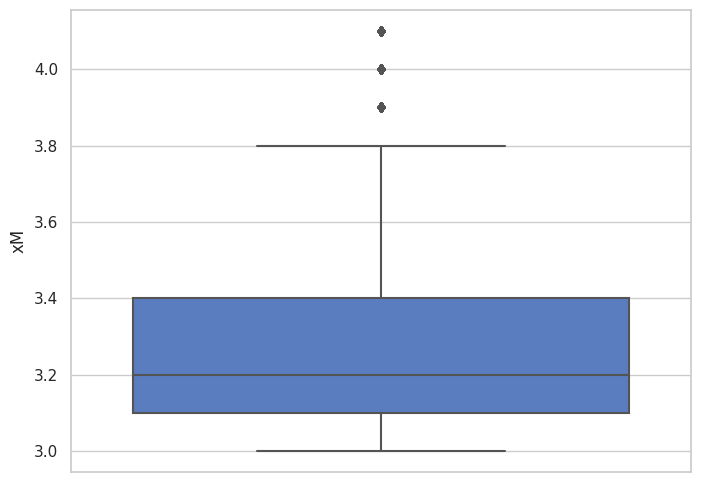

In [397]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["xM"],
            orient = "v");

baskılama yöntemi

In [398]:
df = df_.copy()

In [399]:
df.loc[df_xM > upper_fence, "xM"] = upper_fence

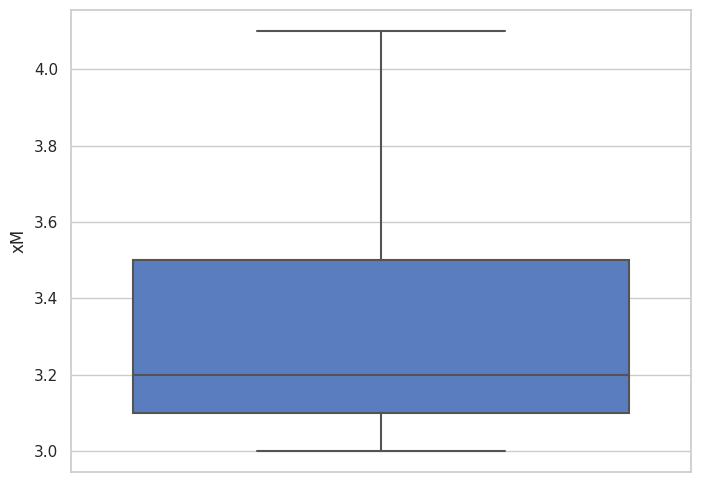

In [400]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["xM"],
            orient = "v");